In [ ]:
#Célula 1: Montagem do drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Célula 2 - Carregamento dos Dados

# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


# mostrar todas as colunas
pd.set_option('display.max_columns', None)


# Caminhos dos arquivos no Google Drive
path_train = '/content/drive/MyDrive/CreditScoreClassification/train.csv'
path_test = '/content/drive/MyDrive/CreditScoreClassification/test.csv'

# Carregando os arquivos CSV
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

# Exibindo as primeiras linhas de ambos os DataFrames para verificar o carregamento
print("Primeiras 5 linhas do DataFrame de Treino (df_train):")
print(df_train.head())
print("\nPrimeiras 5 linhas do DataFrame de Teste (df_test):")
print(df_test.head())

# Exibindo as informações de ambos os DataFrames
print("\nInformações do DataFrame de Treino (df_train):")
df_train.info()
print("\nInformações do DataFrame de Teste (df_test):")
df_test.info()


<ipython-input-2-203411987>:20: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(path_train)


Primeiras 5 linhas do DataFrame de Treino (df_train):
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4 

In [ ]:
#Célula 3 Lista de colunas a serem excluídas do dataset
colunas_para_excluir = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Occupation',
    'Type_of_Loan',
    'Changed_Credit_Limit',
    'Payment_Behaviour',
    'Annual_Income',
    'Credit_Utilization_Ratio',
    'Credit_History_Age',
    'Monthly_Balance',
    'Interest_Rate',
    'Num_Credit_Inquiries'
]


# Remove as colunas indesejadas do DataFrame de TREINO
df_train = df_train.drop(columns=colunas_para_excluir)

# Remove as colunas indesejadas do DataFrame de TESTE
df_test = df_test.drop(columns=colunas_para_excluir)

# Exibe as 10 primeiras linhas de ambos os DataFrames para verificar a remoção
print("Primeiras 10 linhas do DataFrame de Treino (df_train) após exclusão de colunas:")
print(df_train.head(10))

print("\nPrimeiras 10 linhas do DataFrame de Teste (df_test) após exclusão de colunas:")
print(df_test.head(10))


# Motivos da exclusão:

# ID e Customer_ID: identificadores irrelevantes para o treinamento.
# Name e SSN: dados sensíveis e pessoais, sem valor preditivo.
# Month: representa apenas o mês de coleta do dado. Sem análise temporal, não agrega valor.
# Occupation: variável categórica de alta cardinalidade, já representada indiretamente por renda e número de empréstimos.
# Type_of_Loan: variável textual com múltiplos valores, difícil de codificar e redundante com Num_of_Loan.
# Changed_Credit_Limit: redundante com outras variáveis mais diretas como Credit_Utilization_Ratio e Outstanding_Debt.
# Payment_Behaviour: categórica subjetiva, difícil de padronizar, e com comportamento já refletido em outras variáveis.
# Annual_Income: redundante com Monthly_Inhand_Salary, que reflete melhor a renda real disponível.
# Credit_Utilization_Ratio, Credit_History_Age, Monthly_Balance, Interest_Rate, Num_Credit_Inquiries : Usuários comuns geralmente não sabem calcular ou não têm acesso fácil a essa informação.


Primeiras 10 linhas do DataFrame de Treino (df_train) após exclusão de colunas:
    Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0    23            1824.843333                  3                4   
1    23                    NaN                  3                4   
2  -500                    NaN                  3                4   
3    23                    NaN                  3                4   
4    23            1824.843333                  3                4   
5    23                    NaN                  3                4   
6    23            1824.843333                  3                4   
7    23            1824.843333                  3                4   
8   28_            3037.986667                  2                4   
9    28            3037.986667                  2                4   

  Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment Credit_Mix  \
0           4                    3                      7          _   
1    

In [ ]:
# Célula 4: Limpa e converte colunas numéricas, padronizando dados sujos para identificar NaNs.

colunas_para_converter = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
]

# --- Aplica as substituições e conversões ao df_train ---
print("Processando df_train...")
df_train.replace(['_', '__10000__', '_____', '_______',
                 '__-333333333333333333333333333333333333__'], np.nan, inplace=True)

for coluna in colunas_para_converter:
    # Converte para string para aplicar .str.replace
    df_train[coluna] = df_train[coluna].astype(str).str.replace(r'[^\d\.-]', '', regex=True)
    # Converte para numérico, valores que não podem ser convertidos viram NaN
    df_train[coluna] = pd.to_numeric(df_train[coluna], errors='coerce')

# --- Aplica as substituições e conversões ao df_test ---
print("\nProcessando df_test...")
df_test.replace(['_', '__10000__', '_____', '_______',
                '__-333333333333333333333333333333333333__'], np.nan, inplace=True)

for coluna in colunas_para_converter:
    # Converte para string para aplicar .str.replace
    df_test[coluna] = df_test[coluna].astype(str).str.replace(r'[^\d\.-]', '', regex=True)
    # Converte para numérico, valores que não podem ser convertidos viram NaN
    df_test[coluna] = pd.to_numeric(df_test[coluna], errors='coerce')


# Verifica colunas com valores ausentes restantes em ambos os DataFrames
print("\nValores ausentes em df_train após conversão:")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

print("\nValores ausentes em df_test após conversão:")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])


Processando df_train...

Processando df_test...

Valores ausentes em df_train após conversão:
Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Credit_Mix                 20195
Amount_invested_monthly     8784
dtype: int64

Valores ausentes em df_test após conversão:
Monthly_Inhand_Salary      7498
Num_of_Delayed_Payment     3498
Credit_Mix                 9805
Amount_invested_monthly    4446
dtype: int64


In [ ]:
# Célula 5: Trata valores ausentes, imputando numéricos pela média por grupo 'Credit_Mix' e categóricos pela moda.

def trataFaltantes(df):
    '''
    Substitui:
    - Valores numéricos ausentes pela média agrupada por 'Credit_Mix'.
    - Valores categóricos ausentes pela moda da coluna.
    '''
    df = df.copy() # Trabalha em uma cópia para evitar modificar o DataFrame original fora da função

    colunas_numericas = df.select_dtypes(include='number').columns
    colunas_categoricas = df.select_dtypes(include='object').columns

    # Tratar colunas numéricas com média por classe 'Credit_Mix'
    for col in colunas_numericas:
        # Preenche os NaNs com a média do grupo, se 'Credit_Mix' não for NaN
        df[col] = df.groupby('Credit_Mix')[col].transform(lambda x: x.fillna(x.mean()))
        # Para casos onde 'Credit_Mix' era NaN ou o grupo ainda resultou em NaN, preenche com a média geral
        df[col] = df[col].fillna(df[col].mean()) # AQUI: removido inplace=True e feita atribuição direta

    # Tratar colunas categóricas com moda geral
    for col in colunas_categoricas:
        moda_serie = df[col].mode()
        if not moda_serie.empty:
            moda = moda_serie.iloc[0]
            df[col] = df[col].fillna(moda) # AQUI: removido inplace=True e feita atribuição direta

    return df

# --- Aplica a função ao df_train ---
print("Aplicando tratamento de faltantes ao df_train...")
df_train = trataFaltantes(df_train)

# --- Aplica a função ao df_test ---
print("Aplicando tratamento de faltantes ao df_test...")
df_test = trataFaltantes(df_test)

# Verifica se ainda há faltantes no df_train
print("\nVerificação de valores ausentes em df_train após tratamento:")
faltantes_restantes_train = df_train.isnull().sum()
faltantes_restantes_train = faltantes_restantes_train[faltantes_restantes_train > 0]

if len(faltantes_restantes_train) == 0:
    print("✅ Todos os valores ausentes em df_train foram tratados com sucesso.")
else:
    print("⚠️ Ainda existem valores ausentes nas seguintes colunas em df_train:")
    print(faltantes_restantes_train)

# Verifica se ainda há faltantes no df_test
print("\nVerificação de valores ausentes em df_test após tratamento:")
faltantes_restantes_test = df_test.isnull().sum()
faltantes_restantes_test = faltantes_restantes_test[faltantes_restantes_test > 0]

if len(faltantes_restantes_test) == 0:
    print("✅ Todos os valores ausentes em df_test foram tratados com sucesso.")
else:
    print("⚠️ Ainda existem valores ausentes nas seguintes colunas em df_test:")
    print(faltantes_restantes_test)

# Exibe as linhas que originalmente tinham valores ausentes no df_train (se 'idxRowNan_train' foi definido na Célula 5)
print("\n🧾 Amostras do df_train que possuíam valores faltantes (corrigidas):")
if 'idxRowNan_train' in globals(): # Verifica se a variável foi definida
    display(df_train.iloc[idxRowNan_train])
else:
    print("Variável 'idxRowNan_train' não encontrada. Certifique-se de que a Célula 5 foi executada.")

Aplicando tratamento de faltantes ao df_train...
Aplicando tratamento de faltantes ao df_test...

Verificação de valores ausentes em df_train após tratamento:
✅ Todos os valores ausentes em df_train foram tratados com sucesso.

Verificação de valores ausentes em df_test após tratamento:
✅ Todos os valores ausentes em df_test foram tratados com sucesso.

🧾 Amostras do df_train que possuíam valores faltantes (corrigidas):
Variável 'idxRowNan_train' não encontrada. Certifique-se de que a Célula 5 foi executada.


In [ ]:
# Célula 6: Identifica e remove linhas duplicadas nos datasets de treino e teste com base em colunas identificadoras.

# Lista atualizada de colunas que representam a identidade completa da amostra
colunas_identificadoras = [
    'Age', 'Monthly_Inhand_Salary',
    'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount',
    'Total_EMI_per_month', 'Amount_invested_monthly'
]

# Função de remoção de duplicatas
def delDuplicatas(df, colunas_identificadoras):
    '''
    Remove amostras duplicadas com base nas colunas principais que definem o perfil do cliente.
    Para cada grupo duplicado, mantém apenas a primeira ocorrência.
    '''
    # Identifica e exibe duplicatas ANTES da remoção para cada DataFrame
    df_duplicates = df[df.duplicated(subset=colunas_identificadoras, keep=False)]
    if len(df_duplicates) > 0:
        print(f'\n⚠️ Amostras duplicadas (redundantes ou inconsistentes) encontradas:')
        # Exibe um cabeçalho para diferenciar qual DataFrame estamos mostrando
        if df.equals(df_train): # Simplificação para distinguir no display
             print("--- Duplicatas em df_train ---")
        elif df.equals(df_test):
             print("--- Duplicatas em df_test ---")
        display(df_duplicates.sort_values(by=colunas_identificadoras))
    else:
        if df.equals(df_train):
            print('\n✅ Não existem valores duplicados com base nos atributos principais em df_train.')
        elif df.equals(df_test):
            print('\n✅ Não existem valores duplicados com base nos atributos principais em df_test.')

    antes = len(df)
    df_limpo = df.drop_duplicates(subset=colunas_identificadoras, keep='first')
    depois = len(df_limpo)

    print(f"✅ Duplicatas removidas: {antes - depois}. Dataset final com {depois} linhas.")
    return df_limpo

# Aplicar a função ao df_train
print("\nProcessando df_train para remover duplicatas...")
df_train = delDuplicatas(df_train, colunas_identificadoras)
display(df_train.head()) # Exibe as primeiras linhas do DataFrame limpo

# Aplicar a função ao df_test
print("\nProcessando df_test para remover duplicatas...")
df_test = delDuplicatas(df_test, colunas_identificadoras)
display(df_test.head()) # Exibe as primeiras linhas do DataFrame limpo


Processando df_train para remover duplicatas...

⚠️ Amostras duplicadas (redundantes ou inconsistentes) encontradas:
--- Duplicatas em df_train ---


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
41348   14.000000            1971.032500           8.000000          6.00000   
41349   14.000000            1971.032500           8.000000          6.00000   
90100   15.000000            1654.295833          10.000000          9.00000   
90101   15.000000            1654.295833          10.000000          9.00000   
50907   15.000000            6387.113333           8.000000          7.00000   
...           ...                    ...                ...              ...   
99889  111.523088            4205.579673          17.015513         22.36737   
99894  111.523088            4205.579673          17.015513         22.36737   
99920  111.523088            4205.579673          17.015513         22.36737   
99987  111.523088            4205.579673          17.015513         22.36737   
99988  111.523088            4205.579673          17.015513         22.36737   

       Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment Credit_Mix  \
41348     7.000000            52.000000               19.000000        Bad   
41349     7.000000            52.000000               19.000000        Bad   
90100     5.000000            38.000000               20.000000        Bad   
90101     5.000000            38.000000               20.000000        Bad   
50907     6.000000            27.000000               16.000000   Standard   
...            ...                  ...                     ...        ...   
99889     2.972508            21.063718               30.732534   Standard   
99894     2.972508            21.063718               30.732534   Standard   
99920     2.972508            21.063718               30.732534   Standard   
99987     2.972508            21.063718               30.732534   Standard   
99988     2.972508            21.063718               30.732534   Standard   

       Outstanding_Debt Payment_of_Min_Amount  Total_EMI_per_month  \
41348       1803.770000                   Yes            70.636058   
41349       1803.770000                   Yes            70.636058   
90100       2803.610000                   Yes            76.528332   
90101       2803.610000                   Yes            76.528332   
50907       1172.940000                   Yes           260.846974   
...                 ...                   ...                  ...   
99889       1427.901193                   Yes          1398.279288   
99894       1427.901193                   Yes          1398.279288   
99920       1427.901193                   Yes          1398.279288   
99987       1427.901193                   Yes          1398.279288   
99988       1427.901193                   Yes          1398.279288   

       Amount_invested_monthly Credit_Score  
41348               137.553222         Poor  
41349               137.553222     Standard  
90100               137.553222     Standard  
90101               137.553222         Good  
50907               187.110970     Standard  
...                        ...          ...  
99889               196.097806     Standard  
99894               196.097806         Good  
99920               196.097806     Standard  
99987               196.097806     Standard  
99988               196.097806     Standard  

[20430 rows x 13 columns]

✅ Duplicatas removidas: 20310. Dataset final com 79690 linhas.


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0  111.523088            4205.579673          17.015513         22.36737   
1   23.000000            5679.796637           3.000000          4.00000   
2 -500.000000            5679.796637           3.000000          4.00000   
3   23.000000            5679.796637           3.000000          4.00000   
4   23.000000            1824.843333           3.000000          4.00000   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment Credit_Mix  \
0     2.972508            21.063718               30.732534   Standard   
1     4.000000            -1.000000               24.270947       Good   
2     4.000000             3.000000                7.000000       Good   
3     4.000000             5.000000                4.000000       Good   
4     4.000000             6.000000               24.270947       Good   

   Outstanding_Debt Payment_of_Min_Amount  Total_EMI_per_month  \
0       1427.901193                    No          1398.279288   
1        809.980000                    No            49.574949   
2        809.980000                    No            49.574949   
3        809.980000                    No            49.574949   
4        809.980000                    No            49.574949   

   Amount_invested_monthly Credit_Score  
0               196.097806         Good  
1               118.280222         Good  
2                81.699521         Good  
3               199.458074         Good  
4                41.420153         Good


Processando df_test para remover duplicatas...

⚠️ Amostras duplicadas (redundantes ou inconsistentes) encontradas:
--- Duplicatas em df_test ---


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
19980   15.000000            1451.971667            4.00000         5.000000   
19982   15.000000            1451.971667            4.00000         5.000000   
641     16.000000            2743.497639           10.00000         8.000000   
642     16.000000            2743.497639           10.00000         8.000000   
31625   20.000000            2737.911667            5.00000         7.000000   
...           ...                    ...                ...              ...   
49924  109.533051            4183.103695           16.94865        22.750765   
49927  109.533051            4183.103695           16.94865        22.750765   
49933  109.533051            4183.103695           16.94865        22.750765   
49944  109.533051            4183.103695           16.94865        22.750765   
49995  109.533051            4183.103695           16.94865        22.750765   

       Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment Credit_Mix  \
19980     7.000000            21.000000               11.000000   Standard   
19982     7.000000            21.000000               11.000000   Standard   
641       6.000000            61.000000               21.000000        Bad   
642       6.000000            61.000000               21.000000        Bad   
31625     2.000000            28.000000               13.000000   Standard   
...            ...                  ...                     ...        ...   
49924     3.585172            21.034706               31.497544   Standard   
49927     3.585172            21.034706               31.497544   Standard   
49933     3.585172            21.034706               31.497544   Standard   
49944     3.585172            21.034706               31.497544   Standard   
49995     3.585172            21.034706               31.497544   Standard   

       Outstanding_Debt Payment_of_Min_Amount  Total_EMI_per_month  \
19980       1852.930000                   Yes            75.577840   
19982       1852.930000                   Yes            75.577840   
641         4445.320000                   Yes           113.391084   
642         4445.320000                   Yes           113.391084   
31625       1562.820000                   Yes            44.339006   
...                 ...                   ...                  ...   
49924       1423.530979                   Yes          1507.773478   
49927       1423.530979                   Yes          1507.773478   
49933       1423.530979                   Yes          1507.773478   
49944       1423.530979                   Yes          1507.773478   
49995       1423.530979                   Yes          1507.773478   

       Amount_invested_monthly  
19980               186.279090  
19982               186.279090  
641                 140.578447  
642                 140.578447  
31625               186.279090  
...                        ...  
49924               195.381893  
49927               195.381893  
49933               195.381893  
49944               195.381893  
49995               195.381893  

[9872 rows x 12 columns]

✅ Duplicatas removidas: 9836. Dataset final com 40164 linhas.


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0  23.0            1824.843333                3.0              4.0   
1  24.0            1824.843333                3.0              4.0   
2  24.0            1824.843333                3.0              4.0   
3  24.0            5659.517729                3.0              4.0   
4  28.0            3037.986667                2.0              4.0   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment Credit_Mix  \
0          4.0                  3.0                     7.0       Good   
1          4.0                  3.0                     9.0       Good   
2          4.0                 -1.0                     4.0       Good   
3          4.0                  4.0                     5.0       Good   
4          1.0                  3.0                     1.0       Good   

   Outstanding_Debt Payment_of_Min_Amount  Total_EMI_per_month  \
0            809.98                    No            49.574949   
1            809.98                    No            49.574949   
2            809.98                    No            49.574949   
3            809.98                    No            49.574949   
4            605.03                    No            18.816215   

   Amount_invested_monthly  
0               236.642682  
1                21.465380  
2               148.233938  
3                39.082511  
4                39.684018

In [ ]:
# Célula 7: Remove amostras com atributos idênticos mas 'Credit_Mix' diferentes, garantindo consistência dos dados.

def delInconsistencias(df, target_column='Credit_Mix'):
    '''
    Remove todas as amostras inconsistentes do dataset.
    Inconsistências são definidas como amostras com os mesmos atributos (exceto a coluna alvo)
    mas classificações (target_column) diferentes.
    '''
    df_copy = df.copy() # Trabalha em uma cópia para evitar SettingWithCopyWarning

    # Define as colunas de atributos, excluindo a coluna alvo e a coluna 'Credit_Score'
    # 'Credit_Score' é a nossa variável dependente final, não deve ser usada para definir inconsistência de Credit_Mix
    colunas_atributos = [col for col in df_copy.columns if col not in ['Credit_Score', target_column]]

    # É crucial verificar se colunas_atributos não está vazia, embora no seu caso não deva estar
    if not colunas_atributos:
        print("Aviso: 'colunas_atributos' está vazia. Nenhuma inconsistência pode ser verificada.")
        return df_copy

    # Identifica duplicatas com base nos atributos (ignorando Credit_Mix e Credit_Score)
    duplicadas_por_atributos = df_copy.duplicated(subset=colunas_atributos, keep=False)

    # Filtra o DataFrame para incluir apenas as linhas que são duplicatas por atributo
    df_temp_dups = df_copy[duplicadas_por_atributos]

    # Verifica se há quaisquer duplicatas por atributo. Se não houver, não pode haver inconsistências.
    if df_temp_dups.empty:
        return df_copy # Não há duplicatas por atributo, então não há inconsistências

    # Encontra os grupos de atributos que possuem mais de um valor único na coluna alvo
    grupos_inconsistentes_keys = df_temp_dups.groupby(colunas_atributos)[target_column].nunique()
    grupos_inconsistentes_keys = grupos_inconsistentes_keys[grupos_inconsistentes_keys > 1].index

    # --- CORREÇÃO AQUI ---
    # Se não houver grupos inconsistentes (ou seja, o Index está vazio), retornamos o DataFrame inalterado.
    if grupos_inconsistentes_keys.empty:
        return df_copy

    # Cria um DataFrame auxiliar com as chaves dos grupos inconsistentes
    df_keys_to_remove = pd.DataFrame(grupos_inconsistentes_keys, columns=colunas_atributos)

    # Identifica as linhas no DataFrame original que correspondem aos grupos inconsistentes
    # Usamos o merge para encontrar os índices das linhas a serem removidas
    # Resetar o índice antes do merge para ter uma coluna de 'index' para referenciar
    df_copy_reset = df_copy.reset_index().rename(columns={'index': 'original_index'})

    df_merged = df_copy_reset.merge(df_keys_to_remove, on=colunas_atributos, how='inner')

    # Pega os índices originais das linhas que devem ser removidas
    indices_to_remove = df_merged['original_index'].unique()

    # Remove as linhas inconsistentes do DataFrame original
    # Usamos o índice original do DataFrame antes do reset
    df_limpo = df_copy.loc[~df_copy.index.isin(indices_to_remove)]

    return df_limpo

# --- Processando df_train ---
print("Processando df_train para remover inconsistências...")
antes_train = len(df_train)
df_train = delInconsistencias(df_train, target_column='Credit_Mix')
depois_train = len(df_train)

if (antes_train - depois_train) == 0:
    print(f'✅ Não foram encontradas inconsistências em df_train. Total de linhas: {depois_train}.')
else:
    print(f'✅ Inconsistências removidas com sucesso em df_train. {antes_train - depois_train} linhas eliminadas. Total de linhas: {depois_train}.')

# --- Processando df_test ---
print("\nProcessando df_test para remover inconsistências...")
antes_test = len(df_test)
df_test = delInconsistencias(df_test, target_column='Credit_Mix')
depois_test = len(df_test)

if (antes_test - depois_test) == 0:
    print(f'✅ Não foram encontradas inconsistências em df_test. Total de linhas: {depois_test}.')
else:
    print(f'✅ Inconsistências removidas com sucesso em df_test. {antes_test - depois_test} linhas eliminadas. Total de linhas: {depois_test}.')

Processando df_train para remover inconsistências...
✅ Não foram encontradas inconsistências em df_train. Total de linhas: 79690.

Processando df_test para remover inconsistências...
✅ Não foram encontradas inconsistências em df_test. Total de linhas: 40164.


In [ ]:
# Célula 8: Exibe estatísticas descritivas para identificar outliers e inconsistências em colunas numéricas.

print("--- Estatísticas Descritivas para df_train ---")
df_train_detalhes = df_train.describe()
display(df_train_detalhes)

print("\n--- Estatísticas Descritivas para df_test ---")
df_test_detalhes = df_test.describe()
display(df_test_detalhes)

# INCONSISTÊNCIAS QUE PRECISAM SER TRATADAS (Reafirmando suas observações):

print("\nINCONSISTÊNCIAS IDENTIFICADAS (Válidas para ambos os DataFrames):")
print("\nAge:")
print("- Mínimo = idades negativas/inválidas. Precisam ser corrigidas (ex: NaN ou limite inferior sensato).")
print("- Máximo = idades biologicamente impossíveis. Precisam ser corrigidas (ex: limite superior sensato ou NaN).")
print("- Média com alto desvio padrão indica forte presença de outliers.")

print("\nMonthly_Inhand_Salary:")
print("- Variação plausível, mas a cauda alta pode ter outliers. Considerar clipping ou winsorização.")

print("\nNum_Bank_Accounts:")
print("- Mínimo = negativo. Inválido. Corrigir para NaN ou 0.")
print("- Máximo = extremamente elevado. Outlier. Corrigir para um limite superior razoável ou NaN.")
print("- Desvio padrão alto indica forte presença de outliers.")

print("\nNum_Credit_Card:")
print("- Máximo = extremamente alto. Outlier. Corrigir para um limite superior razoável ou NaN.")

print("\nNum_of_Loan:")
print("- Mínimo = negativo. Inválido. Corrigir para NaN ou 0.")
print("- Máximo = irrealista. Outlier. Corrigir para um limite superior razoável ou NaN.")
print("- Desvio padrão alto indica forte presença de outliers.")

print("\nDelay_from_due_date:")
print("- Mínimo = negativo. Não faz sentido. Corrigir para 0 ou NaN.")

print("\nNum_of_Delayed_Payment:")
print("- Mínimo = negativo. Inválido. Corrigir para NaN ou 0.")
print("- Máximo = extremamente alto. Outlier. Corrigir para um limite superior razoável ou NaN.")
print("- Desvio padrão alto indica forte presença de outliers.")

print("\nOutstanding_Debt:")
print("- Valores plausíveis, mas convém revisar casos extremos. Considerar capping ou winsorização.")

print("\nTotal_EMI_per_month:")
print("- Máximo = extremamente alto. Outlier. Corrigir para um limite superior razoável ou NaN.")
print("- Desvio padrão alto indica forte presença de outliers.")

print("\nAmount_invested_monthly:")
print("- Variação razoável, mas convém verificar se valores zero são válidos ou ausências. (Provavelmente válidos, mas bom estar ciente).")

--- Estatísticas Descritivas para df_train ---


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  79690.000000           79690.000000       79690.000000   
mean     111.638004            4205.484029          17.032941   
std      692.583928            2967.094648         117.573565   
min     -500.000000             303.645417          -1.000000   
25%       24.000000            1797.319167           3.000000   
50%       33.000000            3455.790000           6.000000   
75%       42.000000            5679.796637           7.000000   
max     8698.000000           15204.633333        1798.000000   

       Num_Credit_Card   Num_of_Loan  Delay_from_due_date  \
count     79690.000000  79690.000000         79690.000000   
mean         22.392347      2.971702            21.065418   
std         128.522038     63.303909            14.844015   
min           0.000000   -100.000000            -5.000000   
25%           4.000000      1.000000            10.000000   
50%           6.000000      3.000000            18.000000   
75%           7.000000      5.000000            28.000000   
max        1499.000000   1496.000000            67.000000   

       Num_of_Delayed_Payment  Outstanding_Debt  Total_EMI_per_month  \
count            79690.000000      79690.000000         79690.000000   
mean                30.759846       1427.954676          1400.209225   
std                217.170109       1157.354643          8291.912496   
min                 -3.000000          0.230000             0.000000   
25%                  9.000000        565.480000            30.488863   
50%                 15.000000       1166.880000            69.421937   
75%                 19.000000       1951.340000           161.747685   
max               4397.000000       4998.070000         82331.000000   

       Amount_invested_monthly  
count             79690.000000  
mean                196.093968  
std                 191.405649  
min                   0.000000  
25%                  77.088689  
50%                 137.553222  
75%                 242.120275  
max                1977.326102


--- Estatísticas Descritivas para df_test ---


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  40164.000000           40164.000000       40164.000000   
mean     109.594702            4182.930156          16.958616   
std      680.604883            2945.936945         117.288907   
min     -500.000000             303.645417          -1.000000   
25%       25.000000            1805.222500           3.000000   
50%       34.000000            3440.001667           6.000000   
75%       43.000000            5659.517729           7.000000   
max     8647.000000           15204.633333        1798.000000   

       Num_Credit_Card   Num_of_Loan  Delay_from_due_date  \
count     40164.000000  40164.000000         40164.000000   
mean         22.765343      3.585219            21.031598   
std         128.660681     68.459077            14.823194   
min           0.000000   -100.000000            -5.000000   
25%           4.000000      1.000000            10.000000   
50%           6.000000      3.000000            18.000000   
75%           7.000000      5.000000            28.000000   
max        1499.000000   1496.000000            67.000000   

       Num_of_Delayed_Payment  Outstanding_Debt  Total_EMI_per_month  \
count            40164.000000      40164.000000         40164.000000   
mean                31.514298       1423.585653          1508.908367   
std                218.761938       1151.769019          8684.390989   
min                 -3.000000          0.230000             0.000000   
25%                  9.000000        567.530000            32.284323   
50%                 15.000000       1160.830000            74.632924   
75%                 19.000000       1941.540000           176.253428   
max               4374.000000       4998.070000         82398.000000   

       Amount_invested_monthly  
count             40164.000000  
mean                195.377512  
std                 188.418814  
min                   0.000000  
25%                  77.244776  
50%                 140.578447  
75%                 241.080520  
max                1867.837027


INCONSISTÊNCIAS IDENTIFICADAS (Válidas para ambos os DataFrames):

Age:
- Mínimo = idades negativas/inválidas. Precisam ser corrigidas (ex: NaN ou limite inferior sensato).
- Máximo = idades biologicamente impossíveis. Precisam ser corrigidas (ex: limite superior sensato ou NaN).
- Média com alto desvio padrão indica forte presença de outliers.

Monthly_Inhand_Salary:
- Variação plausível, mas a cauda alta pode ter outliers. Considerar clipping ou winsorização.

Num_Bank_Accounts:
- Mínimo = negativo. Inválido. Corrigir para NaN ou 0.
- Máximo = extremamente elevado. Outlier. Corrigir para um limite superior razoável ou NaN.
- Desvio padrão alto indica forte presença de outliers.

Num_Credit_Card:
- Máximo = extremamente alto. Outlier. Corrigir para um limite superior razoável ou NaN.

Num_of_Loan:
- Mínimo = negativo. Inválido. Corrigir para NaN ou 0.
- Máximo = irrealista. Outlier. Corrigir para um limite superior razoável ou NaN.
- Desvio padrão alto indica forte presença de outlie

In [ ]:
# Célula 9: Realiza limpeza de dados, converte tipos de colunas, remove NaNs críticos e aplica limites numéricos.

import pandas as pd
import numpy as np # Importar numpy para usar np.nan (se necessário)

def limpar_e_converter_dados(df, df_name="DataFrame"):
    """
    Realiza a limpeza de valores inválidos/extremos e converte tipos de dados.
    """
    total_inicial = len(df)
    print(f"--- Processando {df_name} ---")

    # --- 1. Conversão de Tipos de Dados (Strings para Numéricos) ---
    # Colunas que deveriam ser numéricas, mas estão como 'object'
    cols_to_numeric = [
        'Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt',
        'Amount_invested_monthly', 'Monthly_Balance', 'Num_of_Delayed_Payment',
        # 'Changed_Credit_Limit' pode ser numérica ou categórica dependendo do seu uso
    ]

    for col in cols_to_numeric:
        if col in df.columns:
            # Substituir quaisquer strings não numéricas por NaN (ex: '_', '___', etc.)
            # e então converter para numérico. errors='coerce' transformará falhas em NaN.
            initial_non_numeric_count = df[col].apply(lambda x: not str(x).replace('.', '', 1).isdigit() and str(x) != '').sum()
            df[col] = pd.to_numeric(df[col], errors='coerce')

            if initial_non_numeric_count > 0:
                print(f"  - Em '{col}', {initial_non_numeric_count} valores não numéricos foram convertidos para NaN.")
        else:
            print(f"  - Aviso: Coluna '{col}' não encontrada para conversão em {df_name}.")

    # --- 2. Tratamento de Valores Ausentes (NaNs resultantes da conversão ou originais) ---
    # Estratégia: Remover linhas com NaNs em colunas críticas para o modelo.
    # Você pode querer imputar em vez de remover para alguns, mas para iniciar, vamos remover.
    # Aqui, o Credit_Score do df_train tem 'Good', 'Standard', 'Poor', então não tem NaN de '____'
    # mas outras colunas podem ter.

    # Colunas que NÃO queremos que tenham NaNs e que são essenciais:
    # A LISTA ABAIXO FOI REVISADA: apenas colunas que parecem estar no seu dataset original e são cruciais
    cols_critical_for_dropna = [
        'Monthly_Inhand_Salary',
        'Num_Credit_Inquiries', # Se estiver faltando, será ignorado no filtro abaixo
        'Type_of_Loan',         # Se estiver faltando, será ignorado no filtro abaixo
        'Credit_History_Age',   # Se estiver faltando, será ignorado no filtro abaixo
        'Age', # Adicionei aqui pois vi que está sendo convertido e pode gerar NaNs
        'Outstanding_Debt',
        'Total_EMI_per_month',
        'Amount_invested_monthly'
        # 'Name' foi removida, pois não é uma feature numérica e não é usada por modelos ML diretamente
        # Se 'Name' for importante para alguma análise, trate-a separadamente.
    ]

    # FILTRAR cols_critical_for_dropna para incluir APENAS as colunas que realmente existem no DataFrame
    cols_to_dropna_subset = [col for col in cols_critical_for_dropna if col in df.columns]

    if cols_to_dropna_subset: # Apenas tentar dropar se houver colunas válidas
        initial_rows = len(df)
        df.dropna(subset=cols_to_dropna_subset, inplace=True)
        rows_dropped_na_subset = initial_rows - len(df)
        if rows_dropped_na_subset > 0:
            print(f"  - Removidos {rows_dropped_na_subset} registros com NaN em subset crítico: {', '.join(cols_to_dropna_subset)}.")
        else:
            print(f"  - Nenhuma linha removida por NaN em subset crítico. (Colunas verificadas: {', '.join(cols_to_dropna_subset)})")
    else:
        print("  - Aviso: Nenhuma coluna crítica para remoção de NaNs (subset) encontrada no DataFrame.")


    # --- 3. Lidar com strings específicas como 'NM' em 'Payment_of_Min_Amount' ---
    if 'Payment_of_Min_Amount' in df.columns:
        nm_count = df[df['Payment_of_Min_Amount'] == 'NM'].shape[0]
        if nm_count > 0:
            df = df[df['Payment_of_Min_Amount'] != 'NM'].copy() # Use .copy() após filtragem
            print(f"  - Removidos {nm_count} registros com 'NM' em 'Payment_of_Min_Amount'.")
    else:
        print("  - Aviso: Coluna 'Payment_of_Min_Amount' não encontrada. Ignorando tratamento para ela.")

    # --- 4. Lidar com 'Credit_Score' (se existir e for o tipo que esperamos) ---
    # Como Credit_Score é categórica ('Good', 'Standard', 'Poor') e não tem '____' no train,
    # não precisamos de tratamento especial aqui, apenas garantir que não será usado em limites numéricos.
    if 'Credit_Score' in df.columns:
        # Se houver outros valores que não 'Good', 'Standard', 'Poor', você pode tratá-los aqui
        # Ex: df = df[df['Credit_Score'].isin(['Good', 'Standard', 'Poor'])]
        pass # Por enquanto, não faz nada, pois já sabemos que são válidos.
    else:
        print("  - Aviso: Coluna 'Credit_Score' não encontrada no DataFrame. Ignorando tratamento para ela.")


    # --- 5. Aplicar limites numéricos (agora que as colunas são numéricas) ---
    limites = {
        'Age': (18, 100),
        'Monthly_Inhand_Salary': (0, None),
        'Num_Bank_Accounts': (0, 50),
        'Num_Credit_Card': (0, 50),
        'Num_of_Loan': (0, 40), # Já convertido para numérico
        'Delay_from_due_date': (0, 365),
        'Num_of_Delayed_Payment': (0, None), # Já convertido para numérico
        'Outstanding_Debt': (0, None), # Já convertido para numérico
        'Total_EMI_per_month': (0, 500_000),
        'Amount_invested_monthly': (0, None), # Já convertido para numérico
        'Monthly_Balance': (0, None), # Já convertido para numérico
        # 'Interest_Rate' já é int64
        # 'Credit_Utilization_Ratio' já é float64
        # 'Num_Credit_Inquiries' já é float64
    }

    condicao_total_numerica = pd.Series(True, index=df.index)

    for col, (min_val, max_val) in limites.items():
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            if min_val is not None:
                condicao_total_numerica = condicao_total_numerica & (df[col] >= min_val)
            if max_val is not None:
                condicao_total_numerica = condicao_total_numerica & (df[col] <= max_val)
        elif col in df.columns:
            print(f"  - Aviso: Coluna '{col}' ainda não é numérica para limites. Ignorando.")

    df_filtrado = df[condicao_total_numerica].copy()

    total_final = len(df_filtrado)
    removidos_totais = total_inicial - total_final
    print(f"\nTotal de registros removidos (todas as regras) em {df_name}: {removidos_totais}")
    print(f"Total final de registros válidos em {df_name}: {total_final}")

    return df_filtrado

# --- Aplica a função aos DataFrames de treino e teste ---
# Assegure-se que df_train e df_test foram carregados de seus respectivos CSVs ANTES desta célula.
df_train = limpar_e_converter_dados(df_train, df_name="df_train")
df_test = limpar_e_converter_dados(df_test, df_name="df_test")

print("\nPrimeiras linhas do df_train após limpeza e conversão:")
display(df_train.head())
print("\nPrimeiras linhas do df_test após limpeza e conversão:")
display(df_test.head())

--- Processando df_train ---
  - Em 'Age', 710 valores não numéricos foram convertidos para NaN.
  - Aviso: Coluna 'Annual_Income' não encontrada para conversão em df_train.
  - Em 'Num_of_Loan', 3138 valores não numéricos foram convertidos para NaN.
  - Aviso: Coluna 'Monthly_Balance' não encontrada para conversão em df_train.
  - Em 'Num_of_Delayed_Payment', 495 valores não numéricos foram convertidos para NaN.
  - Nenhuma linha removida por NaN em subset crítico. (Colunas verificadas: Monthly_Inhand_Salary, Age, Outstanding_Debt, Total_EMI_per_month, Amount_invested_monthly)
  - Removidos 9601 registros com 'NM' em 'Payment_of_Min_Amount'.

Total de registros removidos (todas as regras) em df_train: 21295
Total final de registros válidos em df_train: 58395
--- Processando df_test ---
  - Em 'Age', 370 valores não numéricos foram convertidos para NaN.
  - Aviso: Coluna 'Annual_Income' não encontrada para conversão em df_test.
  - Em 'Num_of_Loan', 1608 valores não numéricos foram con

Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
3  23.0            5679.796637                3.0              4.0   
4  23.0            1824.843333                3.0              4.0   
5  23.0            5679.796637                3.0              4.0   
6  23.0            1824.843333                3.0              4.0   
7  23.0            1824.843333                3.0              4.0   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment Credit_Mix  \
3          4.0                  5.0                4.000000       Good   
4          4.0                  6.0               24.270947       Good   
5          4.0                  8.0                4.000000       Good   
6          4.0                  3.0                8.000000       Good   
7          4.0                  3.0                6.000000       Good   

   Outstanding_Debt Payment_of_Min_Amount  Total_EMI_per_month  \
3            809.98                    No            49.574949   
4            809.98                    No            49.574949   
5            809.98                    No            49.574949   
6            809.98                    No            49.574949   
7            809.98                    No            49.574949   

   Amount_invested_monthly Credit_Score  
3               199.458074         Good  
4                41.420153         Good  
5                62.430172         Good  
6               178.344067         Good  
7                24.785217     Standard


Primeiras linhas do df_test após limpeza e conversão:


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0  23.0            1824.843333                3.0              4.0   
1  24.0            1824.843333                3.0              4.0   
3  24.0            5659.517729                3.0              4.0   
4  28.0            3037.986667                2.0              4.0   
5  28.0            3037.986667                2.0              4.0   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment Credit_Mix  \
0          4.0                  3.0                     7.0       Good   
1          4.0                  3.0                     9.0       Good   
3          4.0                  4.0                     5.0       Good   
4          1.0                  3.0                     1.0       Good   
5          1.0                  3.0                     3.0       Good   

   Outstanding_Debt Payment_of_Min_Amount  Total_EMI_per_month  \
0            809.98                    No            49.574949   
1            809.98                    No            49.574949   
3            809.98                    No            49.574949   
4            605.03                    No            18.816215   
5            605.03                    No            18.816215   

   Amount_invested_monthly  
0               236.642682  
1                21.465380  
3                39.082511  
4                39.684018  
5               251.627369

In [ ]:
# Célula 10: Remove outliers em colunas numéricas específicas dos datasets de treino e teste usando o método IQR.

import pandas as pd
import numpy as np

print("--- Iniciando Remoção de Outliers por IQR ---")

def remover_outliers_IQR(df, coluna, df_name="DataFrame"):
    """
    Remove outliers de uma coluna usando o método IQR (1.5*IQR).
    Informa quantos registros foram removidos.
    """
    total_inicial_col = len(df)
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    removidos = total_inicial_col - len(df_filtrado)
    if removidos > 0:
        print(f"  - Coluna '{coluna}': {removidos} outliers removidos por IQR.")
    return df_filtrado

# Aplicando a remoção de outliers IQR ao df_train
print(f"\n--- Removendo outliers IQR para df_train ---")
total_inicial_train = len(df_train)
df_train_sem_outliers = df_train.copy() # Crie uma cópia para não modificar o original df_train diretamente se não quiser

colunas_iqr = [
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly'
]

for coluna in colunas_iqr:
    if coluna in df_train_sem_outliers.columns: # Checagem extra para garantir que a coluna existe
        df_train_sem_outliers = remover_outliers_IQR(df_train_sem_outliers, coluna, "df_train")
    else:
        print(f"  - Aviso: Coluna '{coluna}' não encontrada em df_train. Ignorando remoção de IQR.")

removidos_train = total_inicial_train - len(df_train_sem_outliers)
print(f"\nTotal de registros removidos por IQR em df_train: {removidos_train}")
print(f"Total final de registros em df_train após IQR: {len(df_train_sem_outliers)}")

# Faça o mesmo para df_test
print(f"\n--- Removendo outliers IQR para df_test ---")
total_inicial_test = len(df_test)
df_test_sem_outliers = df_test.copy() # Crie uma cópia

for coluna in colunas_iqr:
    if coluna in df_test_sem_outliers.columns: # Checagem extra
        df_test_sem_outliers = remover_outliers_IQR(df_test_sem_outliers, coluna, "df_test")
    else:
        print(f"  - Aviso: Coluna '{coluna}' não encontrada em df_test. Ignorando remoção de IQR.")

removidos_test = total_inicial_test - len(df_test_sem_outliers)
print(f"\nTotal de registros removidos por IQR em df_test: {removidos_test}")
print(f"Total final de registros em df_test após IQR: {len(df_test_sem_outliers)}")

# Atualize seus DataFrames para usar os que estão sem outliers
df_train = df_train_sem_outliers
df_test = df_test_sem_outliers

print("\n--- Remoção de Outliers por IQR Concluída ---")

print("\n--- Estatísticas Descritivas do df_train após remoção de outliers ---")
display(df_train.describe())

print("\n--- Estatísticas Descritivas do df_test após remoção de outliers ---")
display(df_test.describe())

--- Iniciando Remoção de Outliers por IQR ---

--- Removendo outliers IQR para df_train ---
  - Coluna 'Outstanding_Debt': 3438 outliers removidos por IQR.
  - Coluna 'Total_EMI_per_month': 3895 outliers removidos por IQR.
  - Coluna 'Amount_invested_monthly': 3718 outliers removidos por IQR.

Total de registros removidos por IQR em df_train: 11051
Total final de registros em df_train após IQR: 47344

--- Removendo outliers IQR para df_test ---
  - Coluna 'Outstanding_Debt': 1750 outliers removidos por IQR.
  - Coluna 'Total_EMI_per_month': 2256 outliers removidos por IQR.
  - Coluna 'Amount_invested_monthly': 1924 outliers removidos por IQR.

Total de registros removidos por IQR em df_test: 5930
Total final de registros em df_test após IQR: 23684

--- Remoção de Outliers por IQR Concluída ---

--- Estatísticas Descritivas do df_train após remoção de outliers ---


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  47344.000000           47344.000000       47344.000000   
mean      34.590423            3882.310544           5.238066   
std       10.168752            2675.533495           2.605085   
min       18.000000             303.645417           0.000000   
25%       26.000000            1728.087500           3.000000   
50%       34.000000            3176.265000           5.000000   
75%       42.000000            5486.801250           7.000000   
max      100.000000           15204.633333          43.000000   

       Num_Credit_Card   Num_of_Loan  Delay_from_due_date  \
count     47344.000000  47344.000000         47344.000000   
mean          5.429981      3.257731            20.054854   
std           2.117286      2.324358            14.047721   
min           0.000000      0.000000             0.000000   
25%           4.000000      2.000000            10.000000   
50%           5.000000      3.000000            17.000000   
75%           7.000000      5.000000            27.000000   
max          49.000000     39.000000            67.000000   

       Num_of_Delayed_Payment  Outstanding_Debt  Total_EMI_per_month  \
count            47344.000000      47344.000000         47344.000000   
mean                30.767682       1229.303116            81.564466   
std                221.322787        887.019310            76.805351   
min                  0.000000          0.230000             0.000000   
25%                  9.000000        531.860000            25.157721   
50%                 14.000000       1086.370000            57.218288   
75%                 19.000000       1656.280000           117.162802   
max               4397.000000       3862.450000           343.788951   

       Amount_invested_monthly  
count             47344.000000  
mean                153.436389  
std                 102.847826  
min                   0.000000  
25%                  73.074987  
50%                 130.933125  
75%                 204.392247  
max                 491.752777


--- Estatísticas Descritivas do df_test após remoção de outliers ---


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  23684.000000           23684.000000       23684.000000   
mean      34.950600            3823.371815           5.245440   
std       10.179772            2662.442295           2.568672   
min       18.000000             303.645417           0.000000   
25%       26.000000            1711.762500           3.000000   
50%       35.000000            3101.658457           5.000000   
75%       43.000000            5298.447500           7.000000   
max       56.000000           15204.633333          38.000000   

       Num_Credit_Card   Num_of_Loan  Delay_from_due_date  \
count     23684.000000  23684.000000         23684.000000   
mean          5.442155      3.274700            20.069878   
std           2.149421      2.323087            14.077465   
min           0.000000      0.000000             0.000000   
25%           4.000000      2.000000            10.000000   
50%           5.000000      3.000000            17.000000   
75%           7.000000      5.000000            27.000000   
max          50.000000     35.000000            67.000000   

       Num_of_Delayed_Payment  Outstanding_Debt  Total_EMI_per_month  \
count            23684.000000      23684.000000         23684.000000   
mean                31.607081       1230.088785            87.590146   
std                223.207943        881.500176            83.982602   
min                  0.000000          0.230000             0.000000   
25%                  9.000000        538.785000            25.956709   
50%                 14.000000       1092.630000            60.042792   
75%                 19.000000       1651.230000           127.617609   
max               4374.000000       3822.750000           383.180870   

       Amount_invested_monthly  
count             23684.000000  
mean                151.070542  
std                  99.917089  
min                   0.000000  
25%                  72.848468  
50%                 130.133085  
75%                 201.227641  
max                 477.008991

In [ ]:
# Célula 11: Aplica a normalização Z-score (StandardScaler) às colunas numéricas de treino e teste.

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Lista das colunas numéricas (Certifique-se de que correspondem às do seu DF final)
# REMOVIDAS: 'Annual_Income' e 'Monthly_Balance' porque o log da Célula 9 indicou que não foram encontradas.
# IMPORTANTE: Se você pretende usar essas colunas e elas existem no seu CSV original,
# você precisará investigar o carregamento dos dados (Célula 1) ou etapas anteriores.
colunas_numericas = [
    'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly'
]

# Filtrar colunas_numericas para incluir APENAS as que realmente existem nos DataFrames atuais
colunas_numericas_existentes_train = [col for col in colunas_numericas if col in df_train.columns]
colunas_numericas_existentes_test = [col for col in colunas_numericas if col in df_test.columns]

# É crucial que as colunas para escalonamento sejam as mesmas em treino e teste
# Se houver diferença aqui, precisaremos de uma estratégia para lidar com isso.
if set(colunas_numericas_existentes_train) != set(colunas_numericas_existentes_test):
    print("⚠️ Atenção: As colunas numéricas presentes em df_train e df_test para normalização são diferentes!")
    # Para prosseguir, usaremos a intersecção das colunas, ou você precisará ajustar seus DataFrames.
    # Por simplicidade, vamos usar as colunas do treino, assumindo que são as que você quer.
    colunas_para_normalizar = colunas_numericas_existentes_train
    print(f"   Usando as seguintes colunas para normalização: {colunas_para_normalizar}")
else:
    colunas_para_normalizar = colunas_numericas_existentes_train


# --- Processando df_train --- (Ajuste no nome da variável, de df_train_limpo para df_train)
print("\n--- Processando df_train para normalização ---")

# 1. Converte as colunas numéricas para float (salvaguarda)
df_train[colunas_para_normalizar] = df_train[colunas_para_normalizar].apply(pd.to_numeric, errors='coerce')

# 2. Tratamento de valores ausentes remanescentes em df_train (se houver)
if df_train[colunas_para_normalizar].isnull().values.any():
    print("⚠️ Valores NaN detectados em df_train. Preenchendo com a média da coluna.")
    df_train[colunas_para_normalizar] = df_train[colunas_para_normalizar].fillna(df_train[colunas_para_normalizar].mean())


# 3. Normalização Z-score usando StandardScaler (TREINO)
scaler = StandardScaler()

# Guardamos os dados originais da primeira amostra ANTES da normalização
primeira_amostra_train_original = df_train[colunas_para_normalizar].iloc[0].values

df_train[colunas_para_normalizar] = scaler.fit_transform(df_train[colunas_para_normalizar])

# Exibe a primeira amostra antes e depois da normalização (usando as duas primeiras colunas como exemplo)
print('\n📌 Primeira amostra de df_train antes da normalização: [%2.4f, %2.4f]' % (primeira_amostra_train_original[0], primeira_amostra_train_original[1]))
print('📌 Primeira amostra de df_train após normalização: [%2.4f, %2.4f]' % (df_train[colunas_para_normalizar].iloc[0, 0], df_train[colunas_para_normalizar].iloc[0, 1]))
print(f"Média calculada pelo scaler (primeiras 2 col): [{scaler.mean_[0]:.4f}, {scaler.mean_[1]:.4f}]")
print(f"Desvio padrão calculado pelo scaler (primeiras 2 col): [{scaler.scale_[0]:.4f}, {scaler.scale_[1]:.4f}]")

# --- Processando df_test --- (Ajuste no nome da variável, de df_test_limpo para df_test)
print("\n--- Processando df_test para normalização ---")

# 1. Converte as colunas numéricas para float (salvaguarda)
df_test[colunas_para_normalizar] = df_test[colunas_para_normalizar].apply(pd.to_numeric, errors='coerce')

# 2. Tratamento de valores ausentes remanescentes em df_test (se houver)
if df_test[colunas_para_normalizar].isnull().values.any():
    print("⚠️ Valores NaN detectados em df_test. Preenchendo com a média DO TREINO (do scaler).")
    # Preenche com a média e desvio padrão calculados NO TREINO
    for i, col in enumerate(colunas_para_normalizar):
        # Verifica se a coluna existe no df_test antes de preencher
        if col in df_test.columns:
            df_test[col].fillna(scaler.mean_[i], inplace=True)
        else:
            print(f"   Aviso: Coluna '{col}' não encontrada em df_test para preenchimento de NaN.")


# 3. Normalização Z-score usando StandardScaler (TESTE)
# APENAS TRANSFORMA (transform) o df_test usando o scaler JÁ AJUSTADO (fit) no df_train
primeira_amostra_test_original = df_test[colunas_para_normalizar].iloc[0].values

# Verifica se todas as colunas para normalizar existem no df_test antes de transformar
missing_cols_test = [col for col in colunas_para_normalizar if col not in df_test.columns]
if missing_cols_test:
    print(f"⚠️ As seguintes colunas para normalização não estão em df_test e serão ignoradas: {missing_cols_test}")
    # Cria um subconjunto de colunas que realmente existem no df_test para a transformação
    cols_to_transform_in_test = [col for col in colunas_para_normalizar if col in df_test.columns]
    df_test[cols_to_transform_in_test] = scaler.transform(df_test[cols_to_transform_in_test])
else:
    df_test[colunas_para_normalizar] = scaler.transform(df_test[colunas_para_normalizar])


# Exibe a primeira amostra antes e depois da normalização (usando as duas primeiras colunas como exemplo)
if len(colunas_para_normalizar) >= 2: # Garante que há pelo menos 2 colunas para exibir
    print('\n📌 Primeira amostra de df_test antes da normalização: [%2.4f, %2.4f]' % (primeira_amostra_test_original[0], primeira_amostra_test_original[1]))
    print('📌 Primeira amostra de df_test após normalização: [%2.4f, %2.4f]' % (df_test[colunas_para_normalizar].iloc[0, 0], df_test[colunas_para_normalizar].iloc[0, 1]))
elif len(colunas_para_normalizar) == 1:
    print('\n📌 Primeira amostra de df_test antes da normalização: [%2.4f]' % (primeira_amostra_test_original[0]))
    print('📌 Primeira amostra de df_test após normalização: [%2.4f]' % (df_test[colunas_para_normalizar].iloc[0, 0]))
else:
    print('\nNão há colunas numéricas para exibir amostras após normalização no df_test.')


# Visualiza resultados finais
print("\n--- df_train após normalização ---")
display(df_train.head())
print("\n--- df_test após normalização ---")
display(df_test.head())


--- Processando df_train para normalização ---

📌 Primeira amostra de df_train antes da normalização: [23.0000, 5679.7966]
📌 Primeira amostra de df_train após normalização: [-1.1398, 0.6718]
Média calculada pelo scaler (primeiras 2 col): [34.5904, 3882.3105]
Desvio padrão calculado pelo scaler (primeiras 2 col): [10.1686, 2675.5052]

--- Processando df_test para normalização ---

📌 Primeira amostra de df_test antes da normalização: [23.0000, 1824.8433]
📌 Primeira amostra de df_test após normalização: [-1.1398, -0.7690]

--- df_train após normalização ---


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
3 -1.13982               0.671831          -0.859123        -0.675391   
4 -1.13982              -0.769001          -0.859123        -0.675391   
5 -1.13982               0.671831          -0.859123        -0.675391   
6 -1.13982              -0.769001          -0.859123        -0.675391   
7 -1.13982              -0.769001          -0.859123        -0.675391   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment Credit_Mix  \
3     0.319347            -1.071705               -0.120945       Good   
4     0.319347            -1.000518               -0.029354       Good   
5     0.319347            -0.858145               -0.120945       Good   
6     0.319347            -1.214078               -0.102872       Good   
7     0.319347            -1.214078               -0.111909       Good   

   Outstanding_Debt Payment_of_Min_Amount  Total_EMI_per_month  \
3         -0.472738                    No            -0.416506   
4         -0.472738                    No            -0.416506   
5         -0.472738                    No            -0.416506   
6         -0.472738                    No            -0.416506   
7         -0.472738                    No            -0.416506   

   Amount_invested_monthly Credit_Score  
3                 0.447478         Good  
4                -1.089157         Good  
5                -0.884872         Good  
6                 0.242182         Good  
7                -1.250902     Standard


--- df_test após normalização ---


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0 -1.139820              -0.769001          -0.859123        -0.675391   
1 -1.041478              -0.769001          -0.859123        -0.675391   
3 -1.041478               0.664251          -0.859123        -0.675391   
4 -0.648112              -0.315575          -1.242992        -0.675391   
5 -0.648112              -0.315575          -1.242992        -0.675391   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment Credit_Mix  \
0     0.319347            -1.214078               -0.107390       Good   
1     0.319347            -1.214078               -0.098354       Good   
3     0.319347            -1.142892               -0.116427       Good   
4    -0.971345            -1.214078               -0.134500       Good   
5    -0.971345            -1.214078               -0.125464       Good   

   Outstanding_Debt Payment_of_Min_Amount  Total_EMI_per_month  \
0         -0.472738                    No            -0.416506   
1         -0.472738                    No            -0.416506   
3         -0.472738                    No            -0.416506   
4         -0.703795                    No            -0.816986   
5         -0.703795                    No            -0.816986   

   Amount_invested_monthly  
0                 0.809032  
1                -1.283181  
3                -1.111886  
4                -1.106038  
5                 0.954731

--- Boxplot dos Atributos Numéricos (Normalizados) em df_train ---


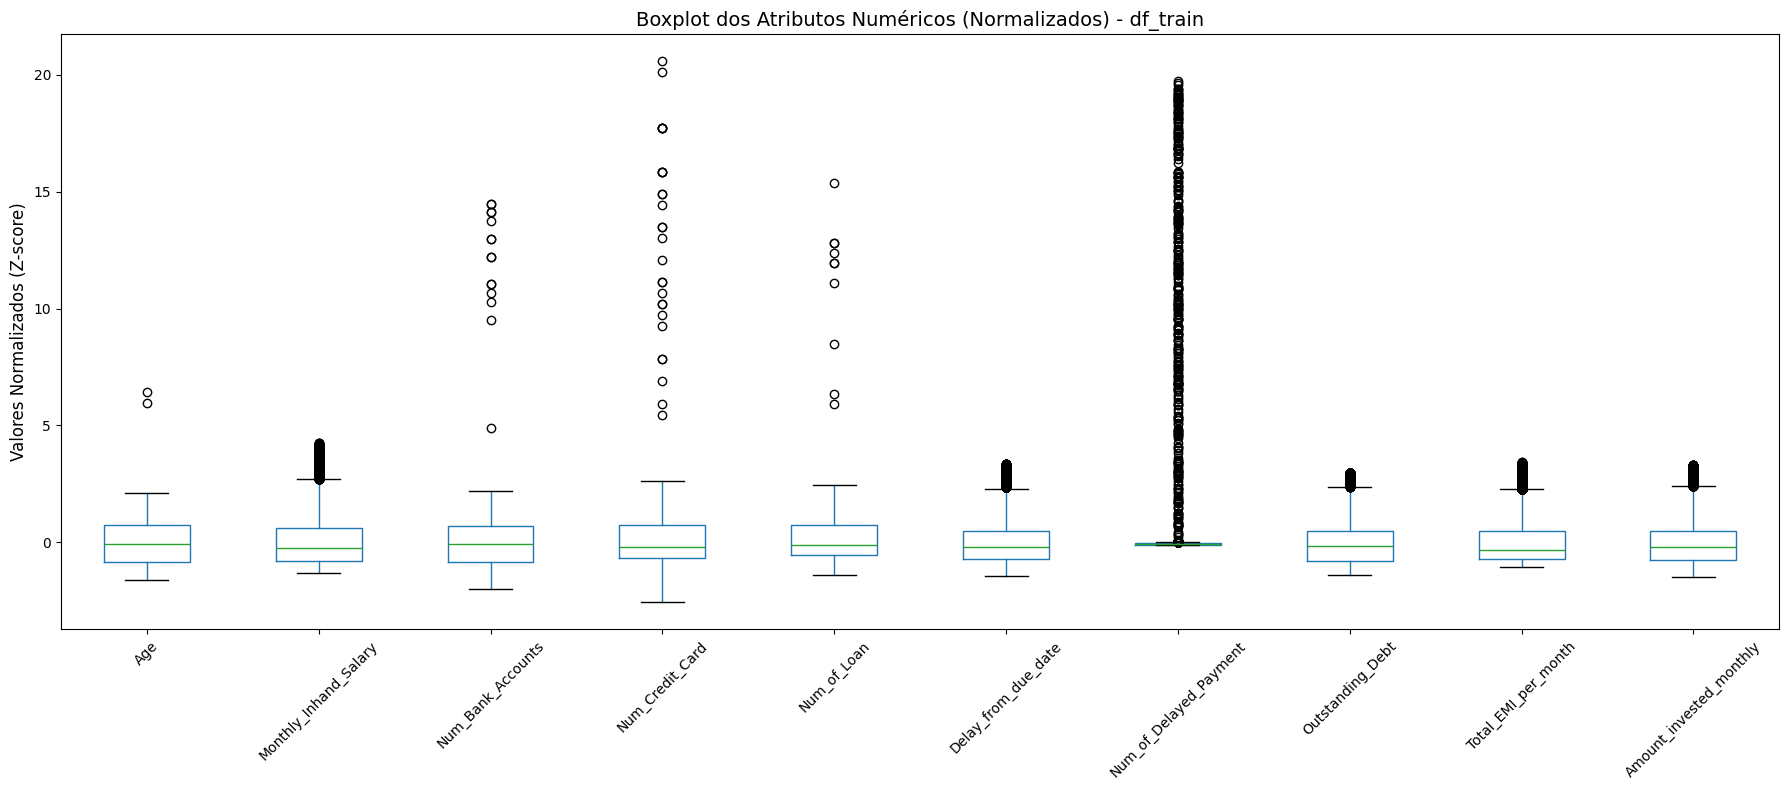

In [ ]:
# Célula 12: Exibe boxplots das features numéricas normalizadas para visualizar a distribuição e outliers remanescentes.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Adicionar se ainda não estiver globalmente disponível

# A lista de colunas numéricas deve ser a mesma utilizada na Célula 11
# Colunas numéricas já devem estar normalizadas nos DataFrames df_train e df_test

# É crucial usar a mesma lista de colunas que foi efetivamente normalizada na Célula 11.
# Assumimos que 'colunas_para_normalizar' da Célula 11 está disponível no escopo global,
# ou vamos recriá-la com base na lista original e checar a existência.

# Se 'colunas_para_normalizar' não for global, você pode definir a lista base aqui
# e filtrar novamente como fizemos na Célula 11.
colunas_base_numericas = [
    'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly'
]

# Filtrar colunas para garantir que existam em ambos os DataFrames após as etapas anteriores
# Usamos a intersecção ou o que foi definido como 'colunas_para_normalizar' na célula anterior.
# Se a Célula 11 já definiu 'colunas_para_normalizar', podemos reusar.
# Caso contrário, essa lógica irá garantir a robustez aqui também.
colunas_para_plotar = [col for col in colunas_base_numericas if col in df_train.columns and col in df_test.columns]

if not colunas_para_plotar:
    print("⚠️ Aviso: Nenhuma coluna numérica comum encontrada para plotar boxplots. Verifique as etapas anteriores.")
else:
    # --- Boxplots para df_train --- (Ajuste no nome da variável)
    print("--- Boxplot dos Atributos Numéricos (Normalizados) em df_train ---")
    df_train.boxplot(column=colunas_para_plotar, figsize=(18, 8), rot=45, grid=False)
    plt.title("Boxplot dos Atributos Numéricos (Normalizados) - df_train", fontsize=14)
    plt.ylabel("Valores Normalizados (Z-score)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    # # --- Boxplots para df_test --- (Ajuste no nome da variável)
    # print("\n--- Boxplot dos Atributos Numéricos (Normalizados) em df_test ---")
    # df_test.boxplot(column=colunas_para_plotar, figsize=(18, 8), rot=45, grid=False)
    # plt.title("Boxplot dos Atributos Numéricos (Normalizados) - df_test", fontsize=14)
    # plt.ylabel("Valores Normalizados (Z-score)", fontsize=12)
    # plt.xticks(fontsize=10)
    # plt.tight_layout()
    # plt.show()

--- Gerando Matriz de Dispersão para df_train (pode levar um tempo)... ---


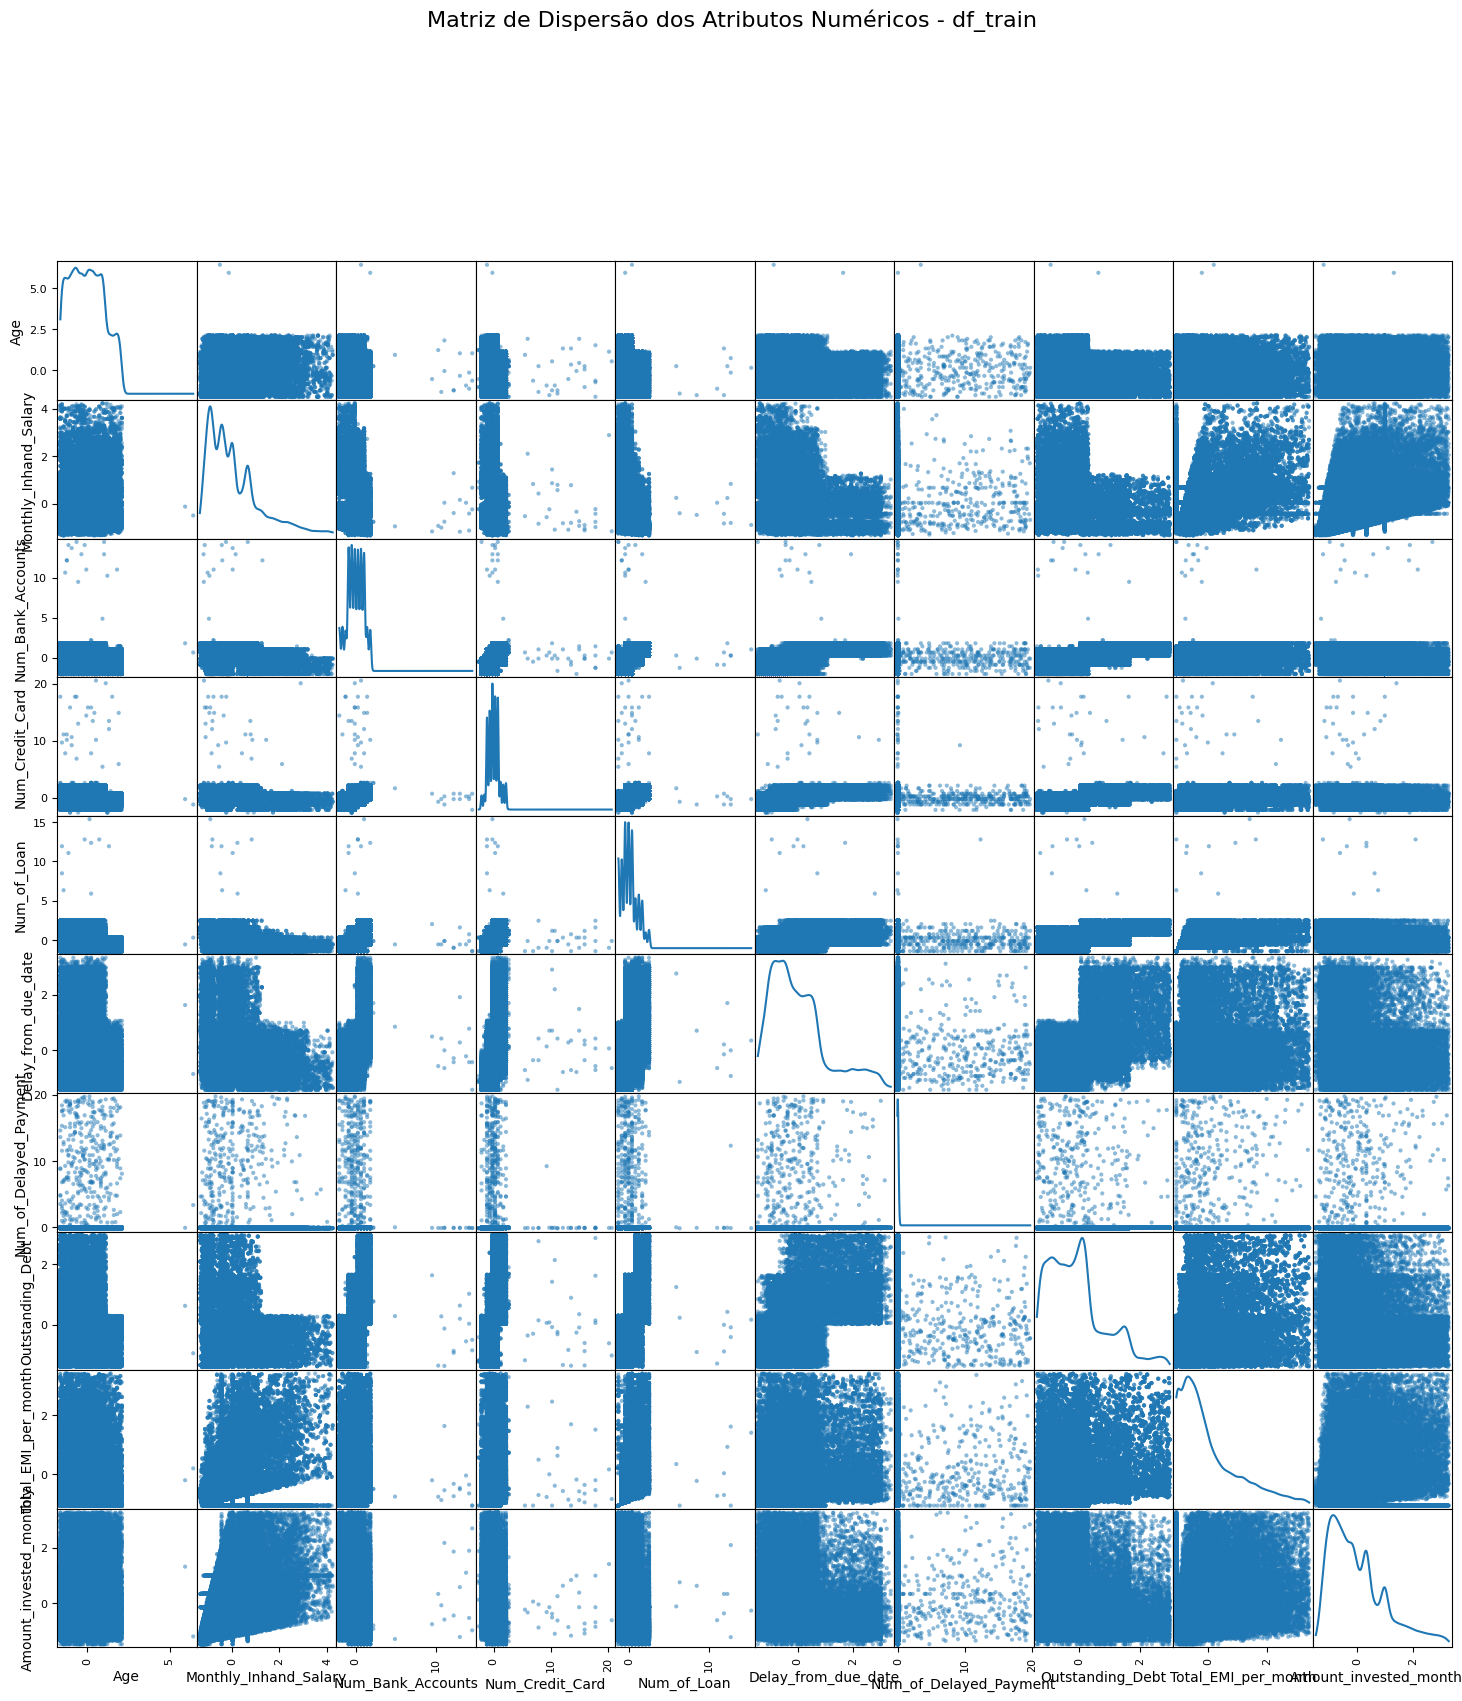

--- Matriz de Dispersão para df_train concluída. ---

--- Gerando Pairplot para df_train (pode demorar MUITO, considere subconjunto de colunas) ---
Visualizando relações entre atributos numéricos coloridos por 'Credit_Mix'.


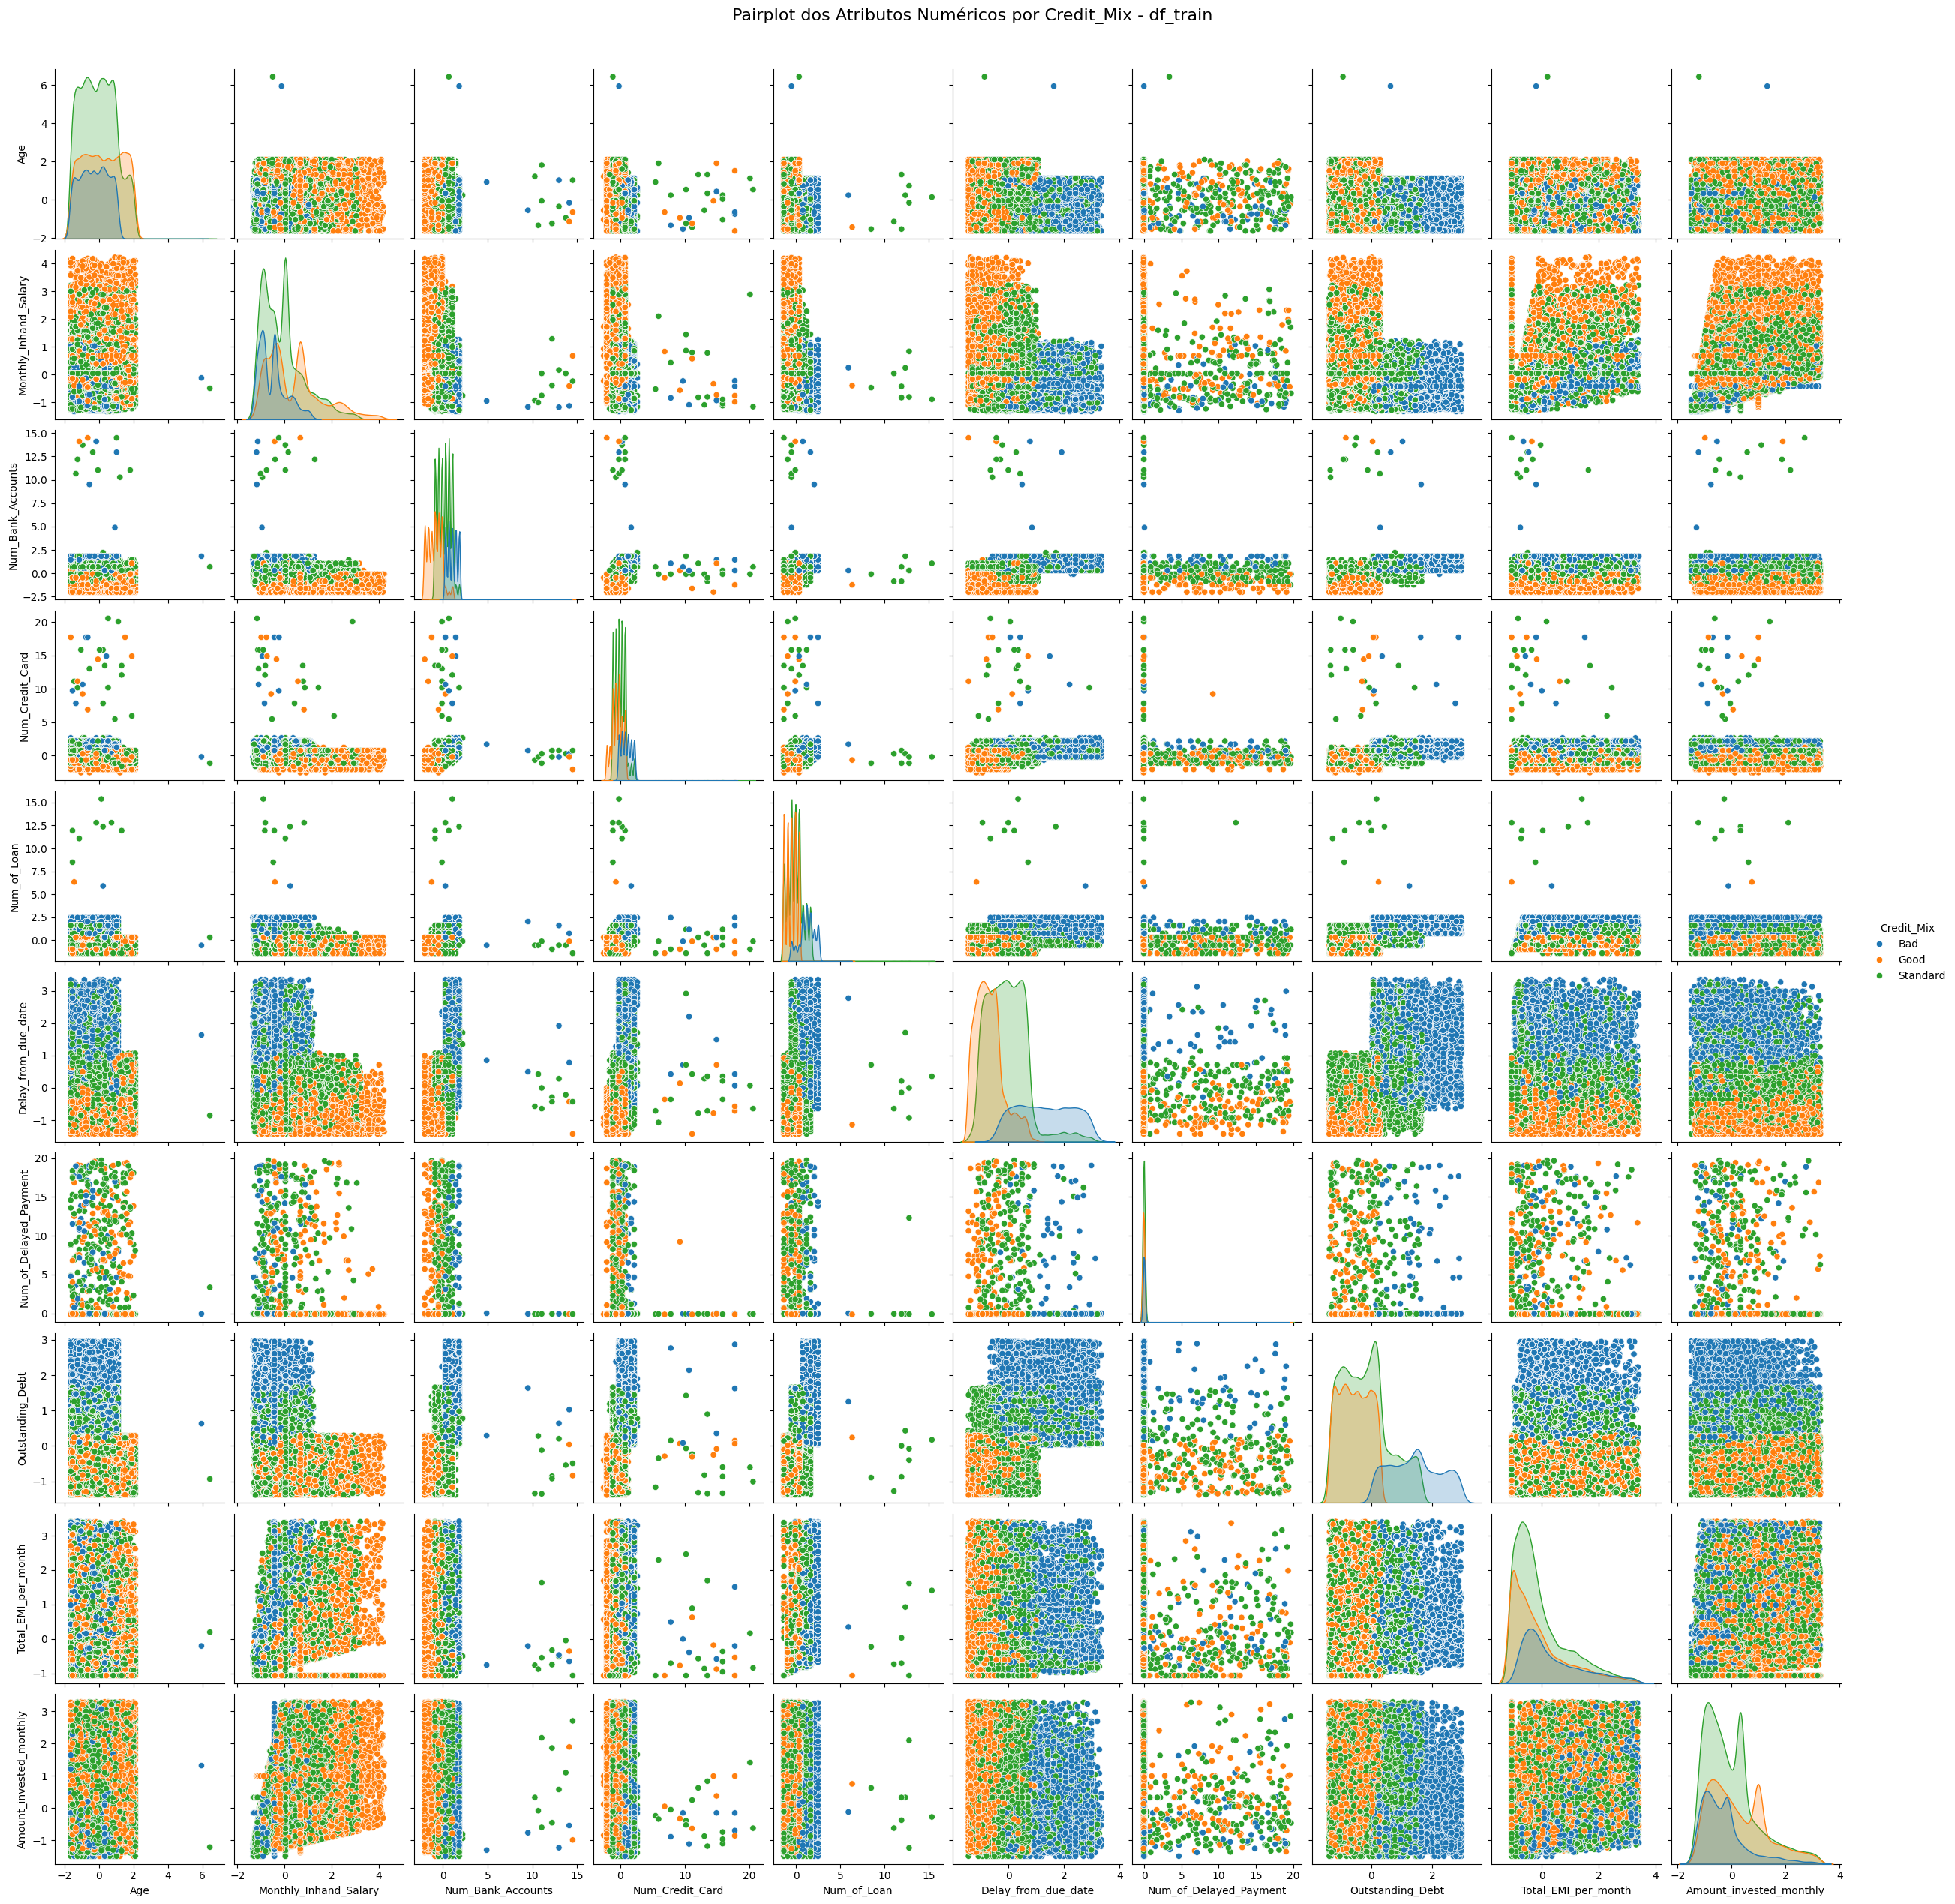

--- Pairplot para df_train concluído. ---


In [ ]:
# Célula 13: Gera matriz de dispersão e pairplot para visualizar relações entre features numéricas e a variável alvo.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Adicionar se ainda não estiver globalmente disponível

# A lista de colunas numéricas base (referência)
colunas_base_numericas = [
    'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly'
]

# --- 1. Matriz de Dispersão (Scatter Matrix) ---
print("--- Gerando Matriz de Dispersão para df_train (pode levar um tempo)... ---")

# Filtrar colunas para garantir que existam em ambos os DataFrames para a scatter_matrix
colunas_para_scatter_matrix = [col for col in colunas_base_numericas if col in df_train.columns and col in df_test.columns]

if not colunas_para_scatter_matrix:
    print("⚠️ Aviso: Nenhuma coluna numérica comum encontrada para gerar matrizes de dispersão. Verifique as etapas anteriores.")
else:
    # Para df_train
    pd.plotting.scatter_matrix(df_train[colunas_para_scatter_matrix], figsize=(18, 18), diagonal='kde')
    plt.suptitle("Matriz de Dispersão dos Atributos Numéricos - df_train", fontsize=16, y=1.02)
    plt.show()
    print("--- Matriz de Dispersão para df_train concluída. ---")

    # Para df_test
    # print("\n--- Gerando Matriz de Dispersão para df_test (pode levar um tempo)... ---")
    # pd.plotting.scatter_matrix(df_test[colunas_para_scatter_matrix], figsize=(18, 18), diagonal='kde')
    # plt.suptitle("Matriz de Dispersão dos Atributos Numéricos - df_test", fontsize=16, y=1.02)
    # plt.show()
    # print("--- Matriz de Dispersão para df_test concluída. ---")


# --- 2. Pairplot (com base na variável alvo 'Credit_Mix') ---
print("\n--- Gerando Pairplot para df_train (pode demorar MUITO, considere subconjunto de colunas) ---")
print("Visualizando relações entre atributos numéricos coloridos por 'Credit_Mix'.")

# Definir as colunas para o pairplot. É ALTAMENTE RECOMENDADO usar um subconjunto menor.
colunas_para_pairplot_base =colunas_numericas = [
    'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly'
]
    # Adicione ou remova colunas conforme sua necessidade de exploração.
    # Evite mais de 5-7 colunas numéricas para não saturar o gráfico.


# Incluir 'Credit_Mix' para o 'hue' SOMENTE se existir no df_train
has_credit_mix = 'Credit_Mix' in df_train.columns
if has_credit_mix:
    colunas_para_pairplot_base.append('Credit_Mix')
else:
    print("⚠️ Aviso: Coluna 'Credit_Mix' não encontrada em df_train. O pairplot será gerado sem 'hue'.")

# Filtrar as colunas que realmente existem no df_train para o pairplot
colunas_existentes_para_pairplot = [
    col for col in colunas_para_pairplot_base if col in df_train.columns
]

# Lógica para garantir que há colunas numéricas suficientes para o pairplot
numeric_cols_for_pairplot = [col for col in colunas_existentes_para_pairplot if pd.api.types.is_numeric_dtype(df_train[col])]

if not numeric_cols_for_pairplot:
    print("⚠️ Aviso: Nenhuma coluna numérica válida encontrada para gerar o pairplot no df_train.")
else:
    hue_col = 'Credit_Mix' if has_credit_mix and 'Credit_Mix' in numeric_cols_for_pairplot + [c for c in colunas_existentes_para_pairplot if c == 'Credit_Mix'] else None

    # Se 'Credit_Mix' está sendo usada como hue, garanta que ela não está na lista de colunas numéricas para o plot
    final_cols_for_pairplot = [col for col in numeric_cols_for_pairplot if col != hue_col]

    if not final_cols_for_pairplot:
        print("⚠️ Aviso: Não há colunas numéricas suficientes para o pairplot após considerar a coluna 'hue'.")
    else:
        # Garante que Credit_Mix é tratada como categoria para o 'hue'
        if hue_col and pd.api.types.is_object_dtype(df_train[hue_col]):
            df_train[hue_col] = df_train[hue_col].astype('category')

        sns.pairplot(df_train[final_cols_for_pairplot + ([hue_col] if hue_col else [])],
                     hue=hue_col,
                     height=2.5,
                     diag_kind='kde')
        plt.suptitle("Pairplot dos Atributos Numéricos por Credit_Mix - df_train", fontsize=16, y=1.02)
        plt.show()
        print("--- Pairplot para df_train concluído. ---")

# Nota: Não é comum fazer pairplot para o df_test, pois o objetivo é explorar padrões no treino.

In [ ]:
# Célula 14: Verifica a ausência de NaNs e as estatísticas descritivas das features numéricas após a normalização.

import pandas as pd # Garante que pandas esteja importado

# A lista de colunas numéricas base (referência)
colunas_base_numericas = [
    'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly'
]

# Filtrar colunas para garantir que existam no DataFrame antes de verificar
# Usamos a intersecção ou o que foi definido como 'colunas_para_normalizar' na célula 11.
# Para esta célula de verificação, podemos usar a lista que de fato foi normalizada.
# Asseguramos que as colunas para checagem são as que existem nos DFs atuais.
colunas_para_verificar_train = [col for col in colunas_base_numericas if col in df_train.columns]
colunas_para_verificar_test = [col for col in colunas_base_numericas if col in df_test.columns]

# --- Verificação de df_train após normalização --- (Ajuste no nome da variável)
print("--- Verificação de df_train após normalização ---")
print("\nValores NaN por coluna em df_train:")
# Verifica se há NaNs nas colunas numéricas do df_train
nan_check_train = df_train[colunas_para_verificar_train].isnull().sum()
print(nan_check_train[nan_check_train > 0]) # Exibe apenas colunas com NaNs, se houver
if nan_check_train.sum() == 0:
    print("✅ Nenhuma valor NaN encontrado nas colunas numéricas de df_train.")
else:
    print("⚠️ Valores NaN ainda existem nas colunas numéricas de df_train. Verifique as etapas anteriores.")

print("\nEstatísticas Descritivas de df_train (Normalizado):")
display(df_train[colunas_para_verificar_train].describe())


# --- Verificação de df_test após normalização --- (Ajuste no nome da variável)
print("\n--- Verificação de df_test após normalização ---")
print("\nValores NaN por coluna em df_test:")
# Verifica se há NaNs nas colunas numéricas do df_test
nan_check_test = df_test[colunas_para_verificar_test].isnull().sum()
print(nan_check_test[nan_check_test > 0]) # Exibe apenas colunas com NaNs, se houver
if nan_check_test.sum() == 0:
    print("✅ Nenhuma valor NaN encontrado nas colunas numéricas de df_test.")
else:
    print("⚠️ Valores NaN ainda existem nas colunas numéricas de df_test. Verifique as etapas anteriores.")

print("\nEstatísticas Descritivas de df_test (Normalizado):")
display(df_test[colunas_para_verificar_test].describe())

--- Verificação de df_train após normalização ---

Valores NaN por coluna em df_train:
Series([], dtype: int64)
✅ Nenhuma valor NaN encontrado nas colunas numéricas de df_train.

Estatísticas Descritivas de df_train (Normalizado):


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  4.734400e+04           4.734400e+04       4.734400e+04   
mean  -1.293697e-16          -2.737475e-16       1.458786e-16   
std    1.000011e+00           1.000011e+00       1.000011e+00   
min   -1.631527e+00          -1.337566e+00      -2.010730e+00   
25%   -8.447953e-01          -8.051650e-01      -8.591235e-01   
50%   -5.806312e-02          -2.638924e-01      -9.138611e-02   
75%    7.286690e-01           5.996963e-01       6.763513e-01   
max    6.432477e+00           4.231845e+00       1.449562e+01   

       Num_Credit_Card   Num_of_Loan  Delay_from_due_date  \
count     4.734400e+04  4.734400e+04         4.734400e+04   
mean      1.344724e-16 -6.243363e-17        -9.004850e-17   
std       1.000011e+00  1.000011e+00         1.000011e+00   
min      -2.564622e+00 -1.401576e+00        -1.427638e+00   
25%      -6.753910e-01 -5.411146e-01        -7.157716e-01   
50%      -2.030832e-01 -1.108837e-01        -2.174649e-01   
75%       7.415324e-01  7.495781e-01         4.944019e-01   
max       2.057846e+01  1.537743e+01         3.341869e+00   

       Num_of_Delayed_Payment  Outstanding_Debt  Total_EMI_per_month  \
count            4.734400e+04      47344.000000         4.734400e+04   
mean             3.001617e-18          0.000000         1.140614e-16   
std              1.000011e+00          1.000011         1.000011e+00   
min             -1.390187e-01         -1.385636        -1.061975e+00   
25%             -9.835368e-02         -0.786286        -7.344194e-01   
50%             -7.576201e-02         -0.161140        -3.169888e-01   
75%             -5.317033e-02          0.481367         4.634926e-01   
max              1.972810e+01          2.968565         3.414180e+00   

       Amount_invested_monthly  
count             4.734400e+04  
mean             -6.303395e-17  
std               1.000011e+00  
min              -1.491894e+00  
25%              -7.813704e-01  
50%              -2.188039e-01  
75%               4.954543e-01  
max               3.289520e+00


--- Verificação de df_test após normalização ---

Valores NaN por coluna em df_test:
Series([], dtype: int64)
✅ Nenhuma valor NaN encontrado nas colunas numéricas de df_test.

Estatísticas Descritivas de df_test (Normalizado):


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  23684.000000           23684.000000       23684.000000   
mean       0.035420              -0.022029           0.002831   
std        1.001094               0.995118           0.986033   
min       -1.631527              -1.337566          -2.010730   
25%       -0.844795              -0.811267          -0.859123   
50%        0.040278              -0.291777          -0.091386   
75%        0.827011               0.529297           0.676351   
max        2.105450               4.231845          12.576280   

       Num_Credit_Card   Num_of_Loan  Delay_from_due_date  \
count     23684.000000  23684.000000         23684.000000   
mean          0.005750      0.007301             0.001070   
std           1.015188      0.999464             1.002128   
min          -2.564622     -1.401576            -1.427638   
25%          -0.675391     -0.541115            -0.715772   
50%          -0.203083     -0.110884            -0.217465   
75%           0.741532      0.749578             0.494402   
max          21.050768     13.656505             3.341869   

       Num_of_Delayed_Payment  Outstanding_Debt  Total_EMI_per_month  \
count            23684.000000      23684.000000         23684.000000   
mean                 0.003793          0.000886             0.078455   
std                  1.008528          0.993788             1.093459   
min                 -0.139019         -1.385636            -1.061975   
25%                 -0.098354         -0.778478            -0.724017   
50%                 -0.075762         -0.154083            -0.280214   
75%                 -0.053170          0.475673             0.599615   
max                 19.624180          2.923808             3.927065   

       Amount_invested_monthly  
count             23684.000000  
mean                 -0.023004  
std                   0.971514  
min                  -1.491894  
25%                  -0.783573  
50%                  -0.226583  
75%                   0.464684  
max                   3.146163

--- Gerando lmplot para df_train ---
Visualizando 'Monthly_Inhand_Salary' vs 'Outstanding_Debt', coloridos por 'Credit_Mix'.


<ipython-input-15-664318068>:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df_plot['Credit_Mix']):


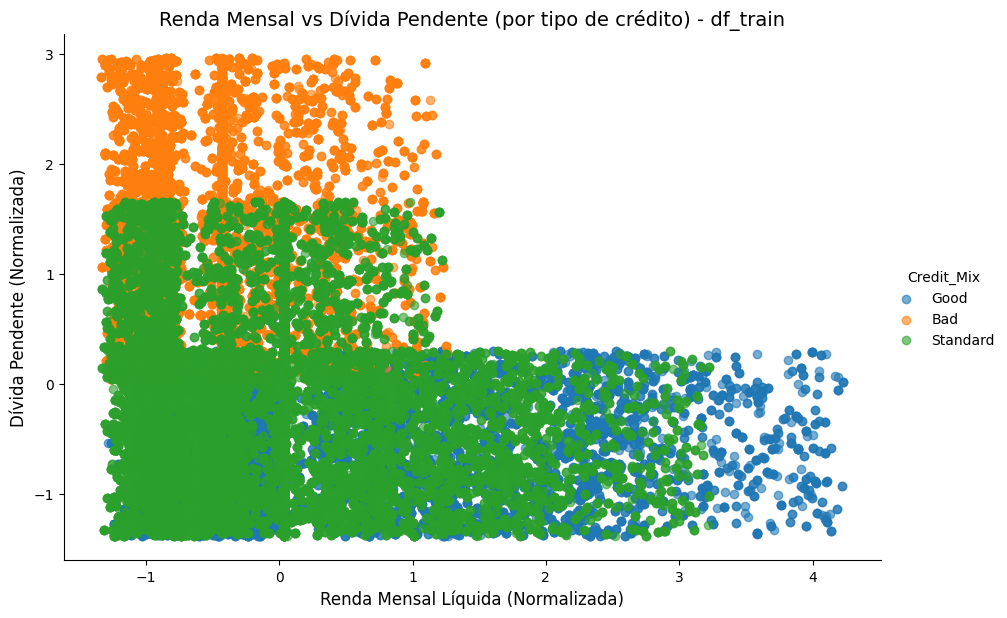

--- lmplot concluído. ---


In [ ]:
# Célula 15: Gera um lmplot para visualizar a relação entre renda mensal e dívida, colorida por 'Credit_Mix'.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Garante que pandas esteja importado

# As colunas numéricas já estão normalizadas em df_train.
# A coluna 'Credit_Mix' ainda é categórica e não foi normalizada,
# então ela é perfeita para o parâmetro 'hue'.

print("--- Gerando lmplot para df_train ---")
print("Visualizando 'Monthly_Inhand_Salary' vs 'Outstanding_Debt', coloridos por 'Credit_Mix'.")

# Definir as colunas necessárias para o lmplot
colunas_necessarias = ['Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Mix']

# Verificar se todas as colunas necessárias existem no df_train
missing_cols = [col for col in colunas_necessarias if col not in df_train.columns]

if missing_cols:
    print(f"⚠️ Aviso: As seguintes colunas necessárias para o lmplot não foram encontradas em df_train: {missing_cols}")
    print("   Não será possível gerar o lmplot.")
else:
    # Definir a ORDEM DESEJADA das categorias para que o Seaborn atribua suas cores padrão.
    # 'Good' será a primeira (azul), 'Bad' a segunda (laranja), 'Standard' a terceira (verde/outra).
    ordem_desejada_cores = ['Good', 'Bad', 'Standard']

    # Criar uma CÓPIA do DataFrame para evitar o SettingWithCopyWarning
    df_plot = df_train.copy()

    # Garantir que 'Credit_Mix' é do tipo 'category' e definir a ordem das categorias.
    # Isso forçará o Seaborn a plotar as cores na ordem especificada.
    if pd.api.types.is_object_dtype(df_plot['Credit_Mix']):
        # Filtra para incluir apenas as categorias que você está definindo
        df_plot = df_plot[df_plot['Credit_Mix'].isin(ordem_desejada_cores)]
        df_plot['Credit_Mix'] = pd.Categorical(df_plot['Credit_Mix'], categories=ordem_desejada_cores, ordered=True)
    elif pd.api.types.is_categorical_dtype(df_plot['Credit_Mix']):
        # Se já for categórica, apenas reordena se necessário
        df_plot = df_plot[df_plot['Credit_Mix'].isin(ordem_desejada_cores)]
        df_plot['Credit_Mix'] = df_plot['Credit_Mix'].cat.reorder_categories(ordem_desejada_cores, ordered=True)
    else:
        print("⚠️ Aviso: 'Credit_Mix' não é do tipo string ou categórico. A ordem das cores pode não ser aplicada.")


    sns.lmplot(x='Monthly_Inhand_Salary', y='Outstanding_Debt', data=df_plot,
               fit_reg=False, hue='Credit_Mix', height=6, aspect=1.5,
               scatter_kws={'alpha':0.6}) # Não especificamos 'palette' para usar a padrão do Seaborn

    plt.title('Renda Mensal vs Dívida Pendente (por tipo de crédito) - df_train', fontsize=14)
    plt.xlabel('Renda Mensal Líquida (Normalizada)', fontsize=12)
    plt.ylabel('Dívida Pendente (Normalizada)', fontsize=12)
    plt.show()

    print("--- lmplot concluído. ---")

--- Gerando Boxplots da distribuição de atributos numéricos por 'Credit_Mix' para df_train ---


<ipython-input-16-2431070614>:25: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif not pd.api.types.is_categorical_dtype(df_train['Credit_Mix']):


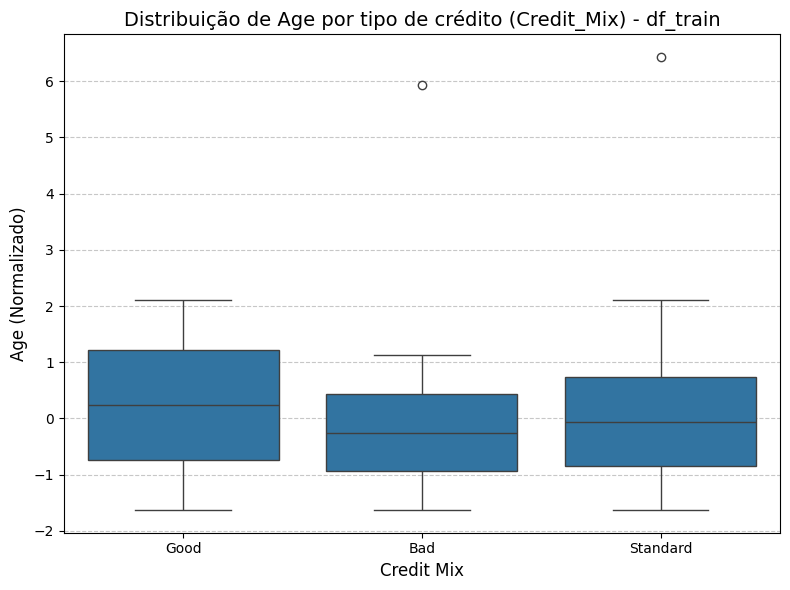

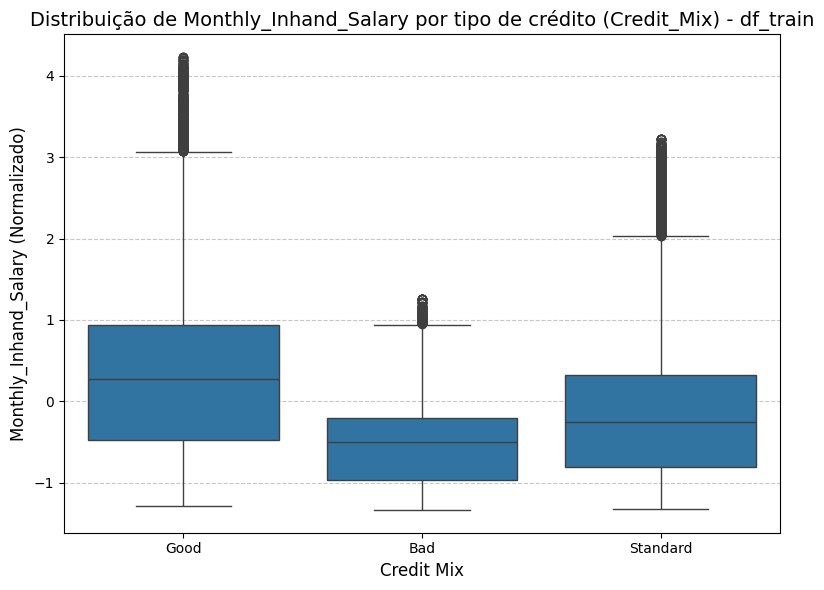

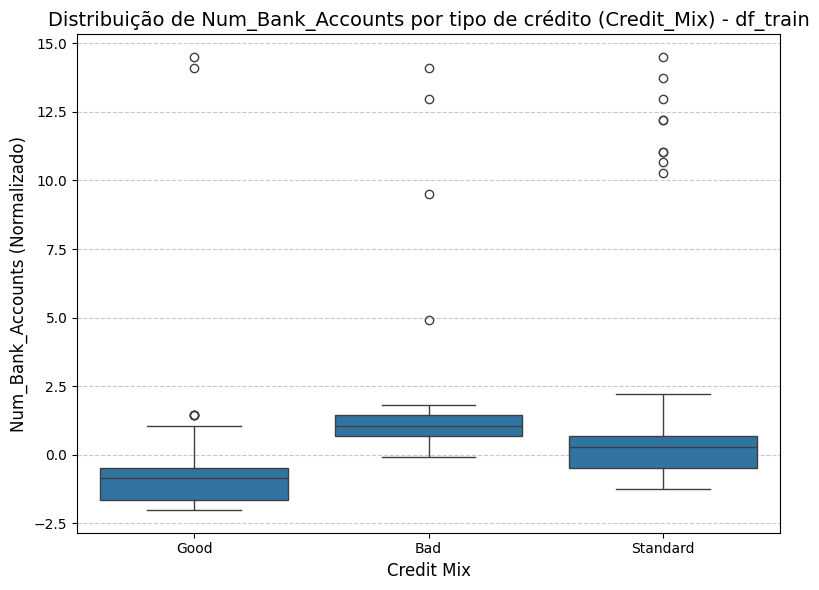

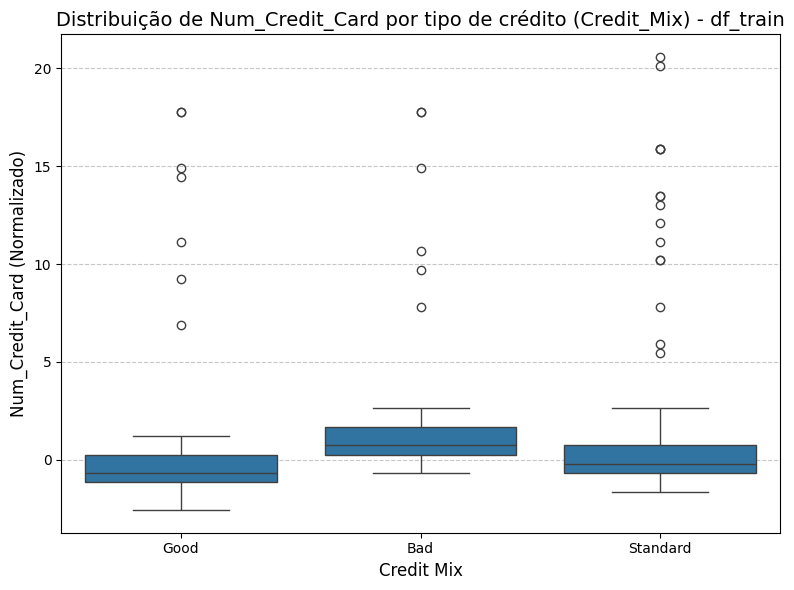

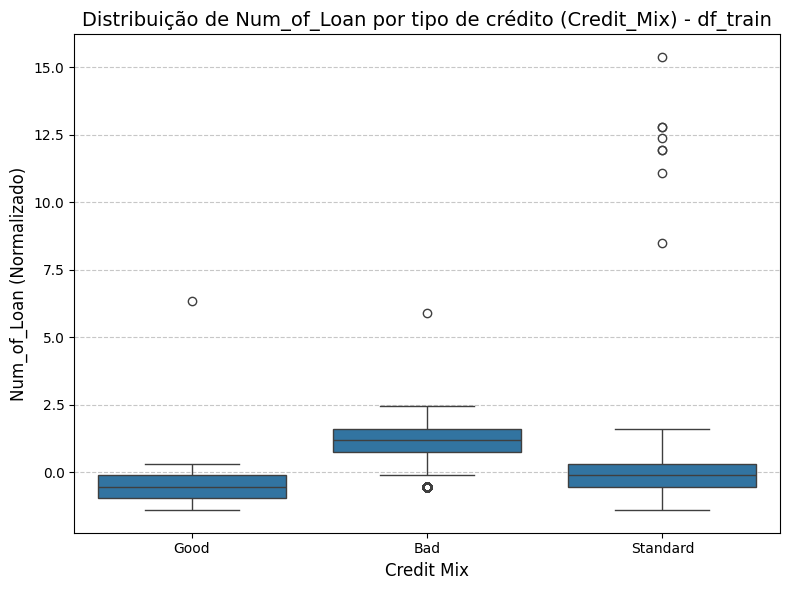

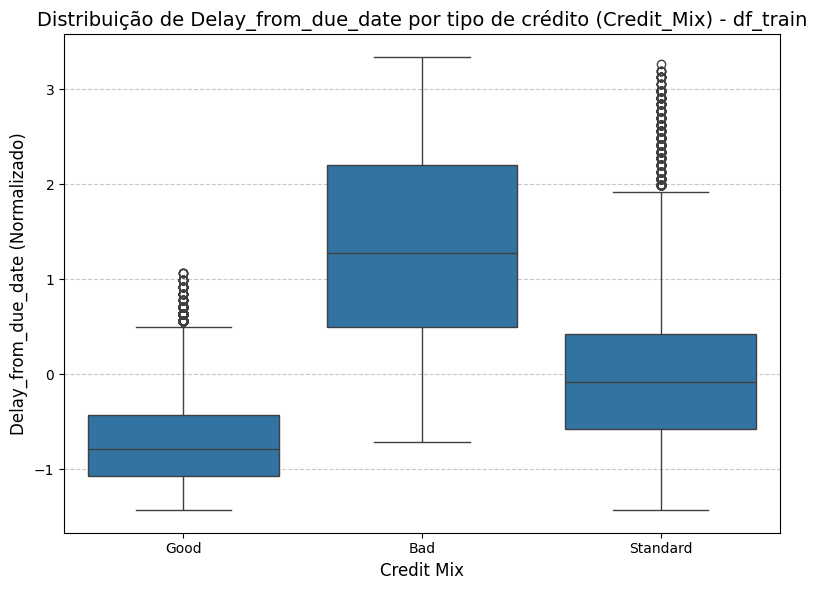

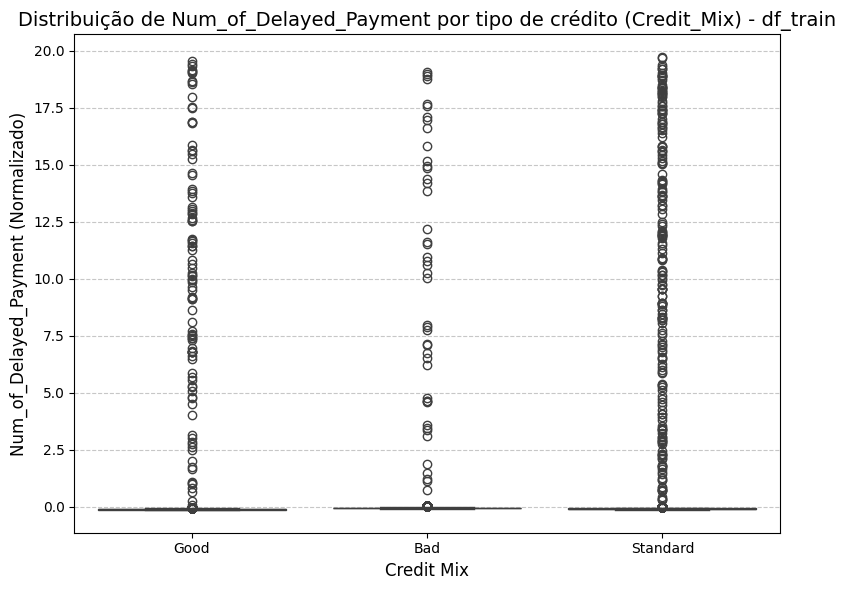

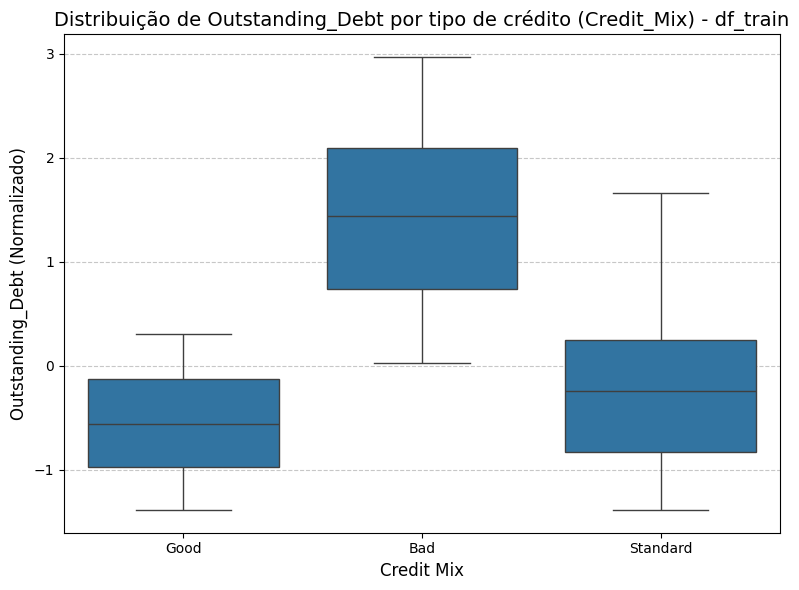

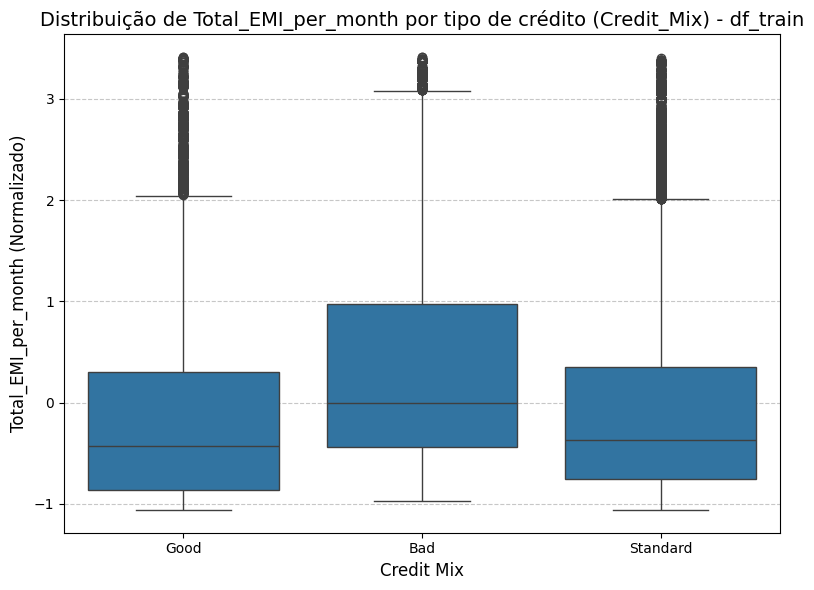

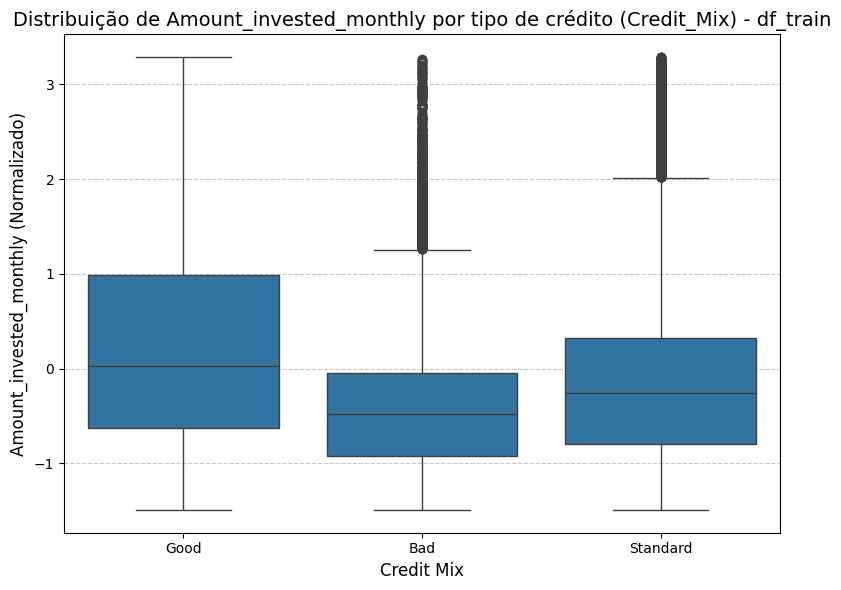

--- Geração de Boxplots concluída. ---


In [ ]:
# Célula 16: Gera boxplots para visualizar a distribuição das features numéricas normalizadas para cada categoria de 'Credit_Mix'.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Garante que pandas esteja importado
import numpy as np  # Garante que numpy esteja importado, caso necessário

# A lista de colunas numéricas base (referência)
colunas_base_numericas = [
    'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly'
]

# df_train já deve estar limpo e normalizado
print("--- Gerando Boxplots da distribuição de atributos numéricos por 'Credit_Mix' para df_train ---")

# Verificar se 'Credit_Mix' existe no df_train
if 'Credit_Mix' not in df_train.columns:
    print("⚠️ Aviso: Coluna 'Credit_Mix' não encontrada em df_train. Não será possível gerar boxplots por ela.")
else:
    # Garantir que 'Credit_Mix' seja do tipo categórico para o boxplot
    if pd.api.types.is_object_dtype(df_train['Credit_Mix']):
        df_train['Credit_Mix'] = df_train['Credit_Mix'].astype('category')
    elif not pd.api.types.is_categorical_dtype(df_train['Credit_Mix']):
        print("⚠️ Aviso: 'Credit_Mix' não é do tipo categórico. O boxplot pode não se comportar como esperado.")

    # Definir a ordem das categorias para as cores, se desejado (consistente com Célula 15)
    # Se você quer a ordem: Good azul, Bad laranja, Standard verde (ou a terceira cor padrão)
    ordem_desejada_cores = ['Good', 'Bad', 'Standard']
    # Reordenar as categorias, filtrando apenas as que existem
    df_train['Credit_Mix'] = pd.Categorical(
        df_train['Credit_Mix'],
        categories=[c for c in ordem_desejada_cores if c in df_train['Credit_Mix'].unique()],
        ordered=True
    )

    # Filtrar as colunas numéricas que realmente existem no df_train para plotagem
    colunas_para_plotar = [col for col in colunas_base_numericas if col in df_train.columns and pd.api.types.is_numeric_dtype(df_train[col])]

    if not colunas_para_plotar:
        print("⚠️ Aviso: Nenhuma coluna numérica válida encontrada para gerar boxplots.")
    else:
        for atributo in colunas_para_plotar:
            plt.figure(figsize=(8, 6)) # Cria uma nova figura para cada boxplot

            # Usamos o df_train diretamente (já com Credit_Mix como category e ordenada)
            sns.boxplot(x='Credit_Mix', y=atributo, data=df_train, whis=1.5)

            plt.title(f'Distribuição de {atributo} por tipo de crédito (Credit_Mix) - df_train', fontsize=14)
            plt.xlabel('Credit Mix', fontsize=12)
            plt.ylabel(f'{atributo} (Normalizado)', fontsize=12)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

print("--- Geração de Boxplots concluída. ---")

--- Análise da Distribuição da Variável Alvo 'Credit_Mix' em df_train ---

Frequência absoluta das categorias de 'Credit_Mix' em df_train:
Credit_Mix
Standard    23546
Good        14976
Bad          8822
Name: count, dtype: int64

Frequência percentual das categorias de 'Credit_Mix' em df_train:
Credit_Mix
Standard    49.73
Good        31.63
Bad         18.63
Name: proportion, dtype: float64


<ipython-input-17-172686210>:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df_train['Credit_Mix']):


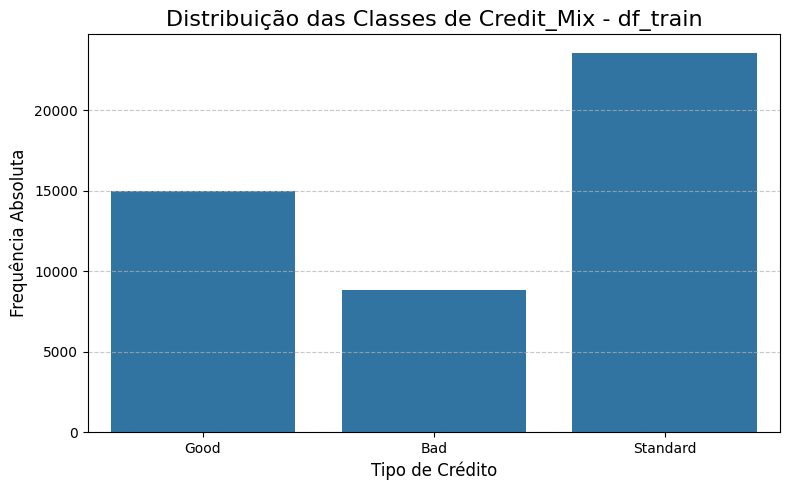


--- Análise da Distribuição da Variável Alvo 'Credit_Mix' em df_test (para comparação) ---

Frequência absoluta das categorias de 'Credit_Mix' em df_test:
Credit_Mix
Standard    11768
Good         7428
Bad          4488
Name: count, dtype: int64

Frequência percentual das categorias de 'Credit_Mix' em df_test:
Credit_Mix
Standard    49.69
Good        31.36
Bad         18.95
Name: proportion, dtype: float64


In [ ]:
# Célula 17: Analisa e visualiza a distribuição das classes da variável alvo 'Credit_Mix' (contagens e percentagens).

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Garante que pandas esteja importado
import numpy as np  # Garante que numpy esteja importado, caso necessário

# A variável alvo é 'Credit_Mix'.

# Definir a ordem das categorias para consistência visual com células anteriores
# Se você quer a ordem: Good azul, Bad laranja, Standard verde (as cores padrão)
ordem_desejada_categorias = ['Good', 'Bad', 'Standard']

# --- Análise para df_train --- (Ajuste no nome da variável)
print("--- Análise da Distribuição da Variável Alvo 'Credit_Mix' em df_train ---")

# Verificar se 'Credit_Mix' existe no df_train
if 'Credit_Mix' not in df_train.columns:
    print("⚠️ Aviso: Coluna 'Credit_Mix' não encontrada em df_train. Não é possível analisar a variável alvo.")
else:
    # Garantir que 'Credit_Mix' seja do tipo categórico e com a ordem definida
    if pd.api.types.is_object_dtype(df_train['Credit_Mix']):
        # Filtrar para incluir apenas as categorias desejadas e depois converter para categórico ordenado
        df_train_plot_temp = df_train[df_train['Credit_Mix'].isin(ordem_desejada_categorias)].copy()
        df_train_plot_temp['Credit_Mix'] = pd.Categorical(df_train_plot_temp['Credit_Mix'], categories=ordem_desejada_categorias, ordered=True)
    elif pd.api.types.is_categorical_dtype(df_train['Credit_Mix']):
        # Se já for categórica, apenas reordenar, filtrando se necessário
        df_train_plot_temp = df_train[df_train['Credit_Mix'].isin(ordem_desejada_categorias)].copy()
        df_train_plot_temp['Credit_Mix'] = df_train_plot_temp['Credit_Mix'].cat.reorder_categories(ordem_desejada_categorias, ordered=True)
    else:
        print("⚠️ Aviso: 'Credit_Mix' não é do tipo string ou categórico. A análise pode não ser como esperado.")
        df_train_plot_temp = df_train.copy() # Usar o df original se não for categórico/object

    # Frequência de cada categoria da variável-alvo (contagens absolutas)
    print("\nFrequência absoluta das categorias de 'Credit_Mix' em df_train:")
    credit_mix_counts_train = df_train_plot_temp['Credit_Mix'].value_counts()
    print(credit_mix_counts_train)

    # Frequência percentual de cada categoria da variável-alvo
    print("\nFrequência percentual das categorias de 'Credit_Mix' em df_train:")
    credit_mix_percentage_train = df_train_plot_temp['Credit_Mix'].value_counts(normalize=True) * 100
    print(credit_mix_percentage_train.round(2))

    plt.figure(figsize=(8, 5))
    # Usar 'order' para garantir que as barras apareçam na ordem desejada
    # Usar a paleta padrão do seaborn (não especificada) ou uma consistente com a Célula 15
    sns.countplot(x='Credit_Mix', data=df_train_plot_temp, order=ordem_desejada_categorias)
    plt.title("Distribuição das Classes de Credit_Mix - df_train", fontsize=16)
    plt.xlabel('Tipo de Crédito', fontsize=12)
    plt.ylabel('Frequência Absoluta', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Opcional: Análise da distribuição da variável alvo também no df_test para comparação
print("\n--- Análise da Distribuição da Variável Alvo 'Credit_Mix' em df_test (para comparação) ---")

# Verificar se 'Credit_Mix' existe no df_test
if 'Credit_Mix' not in df_test.columns:
    print("⚠️ Aviso: Coluna 'Credit_Mix' não encontrada em df_test. Não é possível analisar a variável alvo.")
else:
    # Apenas para exibição no df_test, não precisamos reordenar as categorias para o value_counts
    print("\nFrequência absoluta das categorias de 'Credit_Mix' em df_test:")
    print(df_test['Credit_Mix'].value_counts())
    print("\nFrequência percentual das categorias de 'Credit_Mix' em df_test:")
    print((df_test['Credit_Mix'].value_counts(normalize=True) * 100).round(2))

--- Gerando Matriz de Correlação para df_train ---


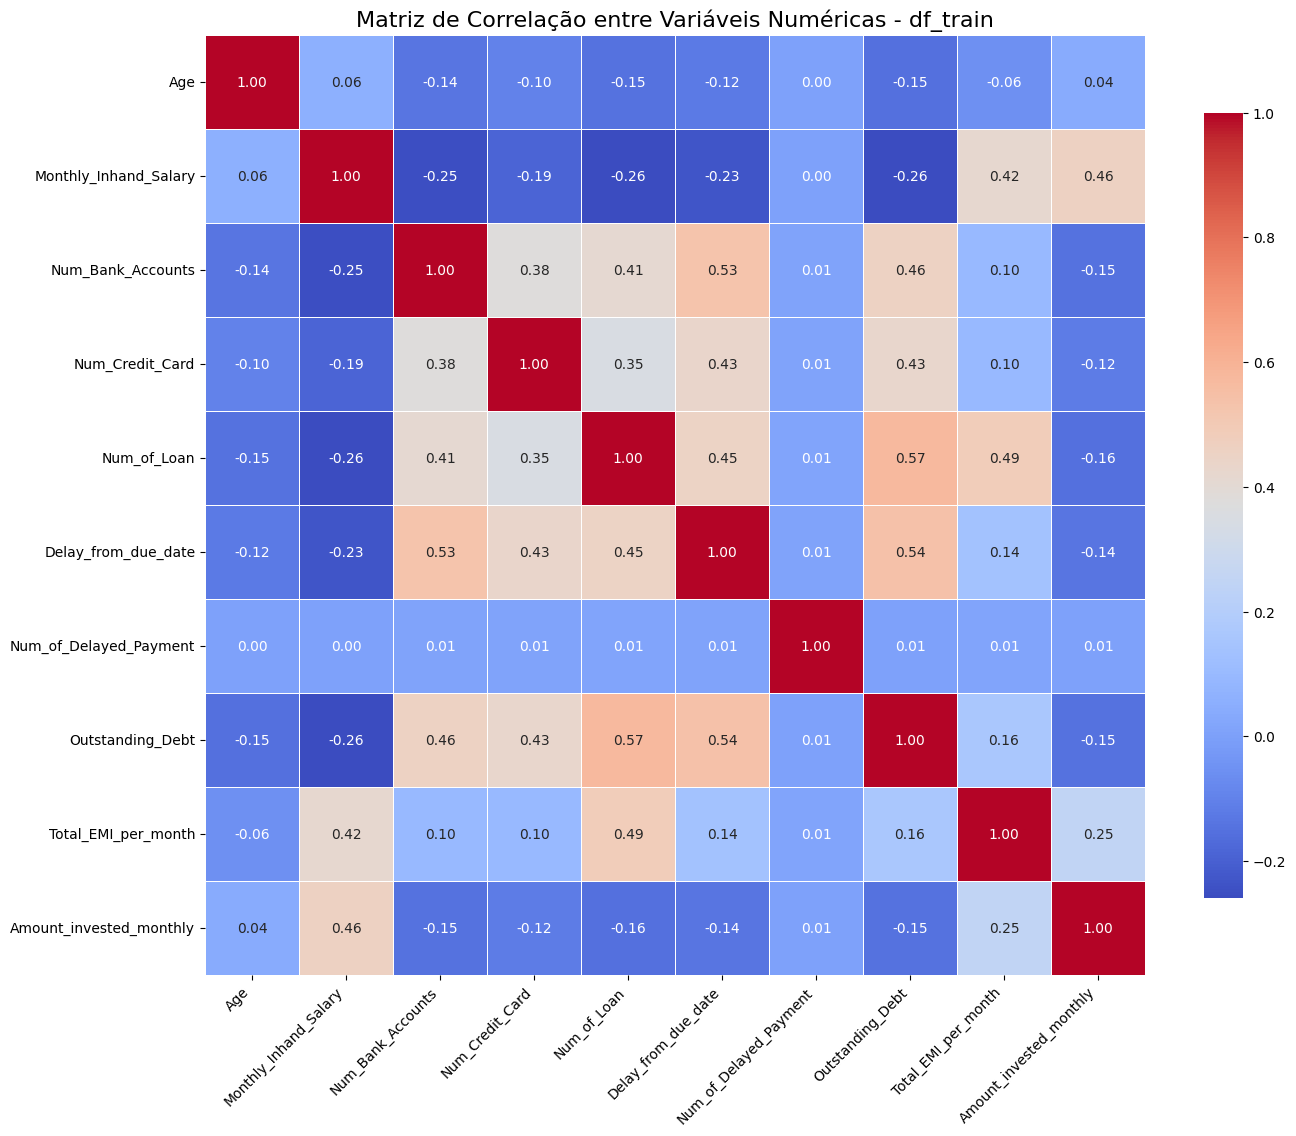

--- Geração da Matriz de Correlação concluída. ---


In [ ]:
# Célula 18: Calcula e exibe a matriz de correlação das features numéricas do dataset de treino.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Garante que numpy esteja importado, caso necessário

# A lista de colunas numéricas base (referência)
colunas_base_numericas = [
    'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly'
]

# df_train já deve estar limpo e normalizado
print("--- Gerando Matriz de Correlação para df_train ---")

# Filtrar as colunas para garantir que existam no df_train e são numéricas
colunas_para_correlacao = [col for col in colunas_base_numericas if col in df_train.columns and pd.api.types.is_numeric_dtype(df_train[col])]

if not colunas_para_correlacao:
    print("⚠️ Aviso: Nenhuma coluna numérica válida encontrada em df_train para calcular a matriz de correlação.")
else:
    # Calcula a matriz de correlação apenas para as colunas numéricas existentes do df_train
    corr_matrix_train = df_train[colunas_para_correlacao].corr()

    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', fmt=".2f", square=True,
                linewidths=.5, cbar_kws={"shrink": .75})

    plt.title('Matriz de Correlação entre Variáveis Numéricas - df_train', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

    print("--- Geração da Matriz de Correlação concluída. ---")

In [ ]:
# Célula 19: Codifica variáveis categóricas (LabelEncoder, OneHotEncoder) e remove colunas irrelevantes.

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

print("--- Iniciando Codificação de Variáveis Categóricas e Limpeza Final ---")

# Criar cópias dos DataFrames para não modificar os originais (df_train, df_test)
df_train_processed = df_train.copy()
df_test_processed = df_test.copy()

# --- 1. Codificação com LabelEncoder (para o Alvo e Feature Binária) ---
# Dicionário para armazenar LabelEncoder para reusá-lo no teste
label_encoders = {}

# Coluna alvo (Credit_Mix)
# Importante: A coluna 'Credit_Mix' deve ser a variável Y (target).
# Se ela for uma feature no X para o df_test, ela deve ser tratada como tal.
# Aqui, a codificação para df_train_processed é para o target.
if 'Credit_Mix' in df_train_processed.columns:
    le_credit_mix = LabelEncoder()
    # Fit e transform no treino
    df_train_processed['Credit_Mix_encoded'] = le_credit_mix.fit_transform(df_train_processed['Credit_Mix'])
    label_encoders['Credit_Mix'] = le_credit_mix
    print(f"\n - 'Credit_Mix' (Alvo) codificada. Mapeamento: {list(le_credit_mix.classes_)} -> {list(range(len(le_credit_mix.classes_)))}")
else:
    print("\n - Aviso: Coluna 'Credit_Mix' não encontrada no df_train. A codificação do alvo pode ser impactada.")

# Se Credit_Mix também está no df_test e precisa ser codificada lá (e.g., para avaliação ou se for uma feature)
# Geralmente, a variável alvo NÃO está no conjunto de teste real para predição.
# Se df_test_processed for o conjunto onde você eventualmente fará previsões e 'Credit_Mix' não será o target ali,
# então esta parte é para tratá-la como feature, o que pode ser inesperado.
# Se 'Credit_Mix' em df_test é o Y_test, não precisa ser uma feature no X_test.
# Vamos assumir que ela PODE existir no df_test para fins de comparação/avaliação posterior.
if 'Credit_Mix' in df_test_processed.columns:
    try:
        df_test_processed['Credit_Mix_encoded'] = label_encoders['Credit_Mix'].transform(df_test_processed['Credit_Mix'])
        print(f" - 'Credit_Mix' codificada no df_test usando o encoder do treino.")
    except KeyError:
        print(" - Erro: LabelEncoder para 'Credit_Mix' não foi ajustado no treino. Não foi possível codificar no teste.")
    except ValueError as e:
        print(f" - Erro ao codificar 'Credit_Mix' no df_test: {e}. Pode haver categorias não vistas no treino.")


# Feature binária (Payment_of_Min_Amount)
if 'Payment_of_Min_Amount' in df_train_processed.columns:
    le_payment_min = LabelEncoder()
    df_train_processed['Payment_of_Min_Amount_encoded'] = le_payment_min.fit_transform(df_train_processed['Payment_of_Min_Amount'])
    label_encoders['Payment_of_Min_Amount'] = le_payment_min
    print(f" - 'Payment_of_Min_Amount' codificada. Mapeamento: {list(le_payment_min.classes_)} -> {list(range(len(le_payment_min.classes_)))}")
else:
    print(" - Aviso: Coluna 'Payment_of_Min_Amount' não encontrada no df_train. A codificação pode ser impactada.")

if 'Payment_of_Min_Amount' in df_test_processed.columns:
    try:
        df_test_processed['Payment_of_Min_Amount_encoded'] = label_encoders['Payment_of_Min_Amount'].transform(df_test_processed['Payment_of_Min_Amount'])
        print(f" - 'Payment_of_Min_Amount' codificada no df_test usando o encoder do treino.")
    except KeyError:
        print(" - Erro: LabelEncoder para 'Payment_of_Min_Amount' não foi ajustado no treino. Não foi possível codificar no teste.")
    except ValueError as e:
        print(f" - Erro ao codificar 'Payment_of_Min_Amount' no df_test: {e}. Pode haver categorias não vistas no treino.")


# --- 2. Codificação com OneHotEncoder (para features categóricas multi-classe) ---
# Credit_Score e outras colunas que são categóricas e não binárias e devem ser features.
cols_for_ohe = ['Credit_Score', 'Occupation', 'Type_of_Loan', 'Payment_Behaviour']

# Filtrar as colunas que realmente existem para OHE
cols_for_ohe_train_actual = [col for col in cols_for_ohe if col in df_train_processed.columns and df_train_processed[col].dtype == 'object']
cols_for_ohe_test_actual = [col for col in cols_for_ohe if col in df_test_processed.columns and df_test_processed[col].dtype == 'object']

if cols_for_ohe_train_actual:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False para DataFrame

    print(f"\n - Processando {cols_for_ohe_train_actual} com One-Hot Encoding...")

    # Fit no treino e transforma para df_train_processed
    ohe_train_features = ohe.fit_transform(df_train_processed[cols_for_ohe_train_actual])
    ohe_train_df = pd.DataFrame(ohe_train_features, columns=ohe.get_feature_names_out(cols_for_ohe_train_actual), index=df_train_processed.index)
    df_train_processed = pd.concat([df_train_processed, ohe_train_df], axis=1)
    df_train_processed.drop(columns=cols_for_ohe_train_actual, inplace=True) # Remover as colunas originais
    print(f"   - {len(cols_for_ohe_train_actual)} colunas One-Hot Encoded no treino. Novas colunas adicionadas.")

    # Apenas transforma o conjunto de teste (usando o mesmo encoder do treino)
    if cols_for_ohe_test_actual:
        ohe_test_features = ohe.transform(df_test_processed[cols_for_ohe_test_actual])
        ohe_test_df = pd.DataFrame(ohe_test_features, columns=ohe.get_feature_names_out(cols_for_ohe_test_actual), index=df_test_processed.index)
        df_test_processed = pd.concat([df_test_processed, ohe_test_df], axis=1)
        df_test_processed.drop(columns=cols_for_ohe_test_actual, inplace=True) # Remover as colunas originais
        print(f"   - {len(cols_for_ohe_test_actual)} colunas One-Hot Encoded no teste usando o encoder do treino.")
    else:
        print("   - Nenhuma coluna para One-Hot Encoding encontrada no df_test ou as colunas não são do tipo 'object'.")
else:
    print(" - Nenhuma coluna para One-Hot Encoding encontrada no df_train ou as colunas não são do tipo 'object'. Ignorando One-Hot Encoding.")


# --- 3. Limpeza Final: Remover colunas não mais necessárias ---
# Lista de colunas a serem removidas dos DataFrames finais.
# Isso inclui as colunas categóricas originais que foram codificadas,
# e colunas identificadoras ou que não serão usadas como features.
cols_to_drop_final = [
    'Credit_Mix',               # Original, agora temos 'Credit_Mix_encoded'
    'Payment_of_Min_Amount',    # Original, agora temos 'Payment_of_Min_Amount_encoded'
    'ID',                       # Identificador
    'Customer_ID',              # Identificador
    'SSN',                      # Identificador/Dados sensíveis
    'Name',                     # Identificador
    'Month',                    # A menos que seja tratado como feature cíclica, geralmente é removido
    'Credit_History_Age',       # Requer parsing complexo para uso numérico; se não for usar, remover.
    'Changed_Credit_Limit',     # Se não for numérico ou categórico para codificação, remover.
    # Outras colunas que não são features para o modelo, como as originais OHE
    # (Elas já são removidas dentro do bloco OHE, mas listá-las aqui serve de documentação)
    #'Credit_Score', 'Occupation', 'Type_of_Loan', 'Payment_Behaviour'
]

# Remover apenas as colunas que realmente existem após todas as operações
# e que ainda não foram removidas (ex: originais OHE são removidas logo após o concat)
cols_to_drop_train_actual = [col for col in cols_to_drop_final if col in df_train_processed.columns]
cols_to_drop_test_actual = [col for col in cols_to_drop_final if col in df_test_processed.columns]

df_train_processed.drop(columns=cols_to_drop_train_actual, errors='ignore', inplace=True)
df_test_processed.drop(columns=cols_to_drop_test_actual, errors='ignore', inplace=True)

print("\n--- Remoção de Colunas Originais e Irrelevantes Concluída ---")
print(f"Colunas restantes em df_train_processed ({len(df_train_processed.columns)}):")
print(df_train_processed.columns.tolist())
print(f"\nColunas restantes em df_test_processed ({len(df_test_processed.columns)}):")
print(df_test_processed.columns.tolist())


print("\nPrimeiras linhas do df_train_processed após codificação e limpeza:")
display(df_train_processed.head())

print("\nPrimeiras linhas do df_test_processed após codificação e limpeza:")
display(df_test_processed.head())

print("--- Codificação de Variáveis Categóricas e Limpeza Final Concluída ---")

--- Iniciando Codificação de Variáveis Categóricas e Limpeza Final ---

 - 'Credit_Mix' (Alvo) codificada. Mapeamento: ['Bad', 'Good', 'Standard'] -> [0, 1, 2]
 - 'Credit_Mix' codificada no df_test usando o encoder do treino.
 - 'Payment_of_Min_Amount' codificada. Mapeamento: ['No', 'Yes'] -> [0, 1]
 - 'Payment_of_Min_Amount' codificada no df_test usando o encoder do treino.

 - Processando ['Credit_Score'] com One-Hot Encoding...
   - 1 colunas One-Hot Encoded no treino. Novas colunas adicionadas.
   - Nenhuma coluna para One-Hot Encoding encontrada no df_test ou as colunas não são do tipo 'object'.

--- Remoção de Colunas Originais e Irrelevantes Concluída ---
Colunas restantes em df_train_processed (15):
['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Credit_Mix_encoded', 'Payment_of_Min_Amount_encoded', 'Credit_Score_Good', 

Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
3 -1.13982               0.671831          -0.859123        -0.675391   
4 -1.13982              -0.769001          -0.859123        -0.675391   
5 -1.13982               0.671831          -0.859123        -0.675391   
6 -1.13982              -0.769001          -0.859123        -0.675391   
7 -1.13982              -0.769001          -0.859123        -0.675391   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  Outstanding_Debt  \
3     0.319347            -1.071705               -0.120945         -0.472738   
4     0.319347            -1.000518               -0.029354         -0.472738   
5     0.319347            -0.858145               -0.120945         -0.472738   
6     0.319347            -1.214078               -0.102872         -0.472738   
7     0.319347            -1.214078               -0.111909         -0.472738   

   Total_EMI_per_month  Amount_invested_monthly  Credit_Mix_encoded  \
3            -0.416506                 0.447478                   1   
4            -0.416506                -1.089157                   1   
5            -0.416506                -0.884872                   1   
6            -0.416506                 0.242182                   1   
7            -0.416506                -1.250902                   1   

   Payment_of_Min_Amount_encoded  Credit_Score_Good  Credit_Score_Poor  \
3                              0                1.0                0.0   
4                              0                1.0                0.0   
5                              0                1.0                0.0   
6                              0                1.0                0.0   
7                              0                0.0                0.0   

   Credit_Score_Standard  
3                    0.0  
4                    0.0  
5                    0.0  
6                    0.0  
7                    1.0


Primeiras linhas do df_test_processed após codificação e limpeza:


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0 -1.139820              -0.769001          -0.859123        -0.675391   
1 -1.041478              -0.769001          -0.859123        -0.675391   
3 -1.041478               0.664251          -0.859123        -0.675391   
4 -0.648112              -0.315575          -1.242992        -0.675391   
5 -0.648112              -0.315575          -1.242992        -0.675391   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  Outstanding_Debt  \
0     0.319347            -1.214078               -0.107390         -0.472738   
1     0.319347            -1.214078               -0.098354         -0.472738   
3     0.319347            -1.142892               -0.116427         -0.472738   
4    -0.971345            -1.214078               -0.134500         -0.703795   
5    -0.971345            -1.214078               -0.125464         -0.703795   

   Total_EMI_per_month  Amount_invested_monthly  Credit_Mix_encoded  \
0            -0.416506                 0.809032                   1   
1            -0.416506                -1.283181                   1   
3            -0.416506                -1.111886                   1   
4            -0.816986                -1.106038                   1   
5            -0.816986                 0.954731                   1   

   Payment_of_Min_Amount_encoded  
0                              0  
1                              0  
3                              0  
4                              0  
5                              0

--- Codificação de Variáveis Categóricas e Limpeza Final Concluída ---


In [ ]:
# Célula 20A: Salva os DataFrames de treino e teste pré-processados em arquivos CSV no Google Drive.

import pandas as pd
import os # Para garantir que o diretório exista

print("--- Salvando Conjuntos de Dados Pré-processados ---")

# Defina o caminho onde você quer salvar os arquivos
# Use o mesmo diretório onde seus arquivos de dados originais estão, ou um subdiretório
# Certifique-se de que este caminho está acessível e é onde você deseja salvar.
output_dir = '/content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial/processed_data'

# Crie o diretório se ele não existir
os.makedirs(output_dir, exist_ok=True)

# Define os nomes dos arquivos de saída
output_train_path = os.path.join(output_dir, 'train_preprocessed.csv')
output_test_path = os.path.join(output_dir, 'test_preprocessed.csv')

# Salva o df_train_processed (ajuste no nome da variável)
# A variável que contém os dados processados da Célula 19 é 'df_train_processed'
if 'df_train_processed' in locals() and not df_train_processed.empty:
    df_train_processed.to_csv(output_train_path, index=False)
    print(f"✅ 'df_train_processed' salvo em: {output_train_path}")
    print(f"   Shape do df_train_processed salvo: {df_train_processed.shape}")
else:
    print("⚠️ 'df_train_processed' não existe ou está vazio. Não foi salvo.")
    print("   Verifique as células anteriores, especialmente a Célula 9 e a Célula 19.")

# Salva o df_test_processed (ajuste no nome da variável)
# A variável que contém os dados processados da Célula 19 é 'df_test_processed'
if 'df_test_processed' in locals() and not df_test_processed.empty:
    df_test_processed.to_csv(output_test_path, index=False)
    print(f"✅ 'df_test_processed' salvo em: {output_test_path}")
    print(f"   Shape do df_test_processed salvo: {df_test_processed.shape}")
else:
    print("⚠️ 'df_test_processed' não existe ou está vazio. Não foi salvo.")
    print("   Verifique as células anteriores, especialmente a Célula 9 e a Célula 19.")

print("\n--- Processo de Salvamento Concluído ---")

--- Salvando Conjuntos de Dados Pré-processados ---
✅ 'df_train_processed' salvo em: /content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial/processed_data/train_preprocessed.csv
   Shape do df_train_processed salvo: (47344, 15)
✅ 'df_test_processed' salvo em: /content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial/processed_data/test_preprocessed.csv
   Shape do df_test_processed salvo: (23684, 12)

--- Processo de Salvamento Concluído ---


In [ ]:
# Célula 20B: Separa as features (X) da variável alvo (y - 'Credit_Mix_encoded') nos conjuntos de treino e teste.

import pandas as pd
import os # Para garantir que os paths de recarregamento são válidos

print("--- Separando Features (X) e Target (y) ---")

# Certifique-se de que df_train_processed e df_test_processed estão carregados.
# Se você reiniciou o kernel e não rodou a Célula 19 ou a Célula 20A,
# você precisará recarregá-los do disco.
# Estes caminhos DEVEM ser os mesmos usados na Célula 20A para salvar.
output_dir = '/content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial/processed_data'
output_train_path = os.path.join(output_dir, 'train_preprocessed.csv')
output_test_path = os.path.join(output_dir, 'test_preprocessed.csv')

# Adicione uma verificação e recarregamento se os DataFrames não existirem na memória
# Usamos 'globals()' para verificar se as variáveis existem no escopo global
if 'df_train_processed' not in globals() or 'df_test_processed' not in globals():
    print("\n--- Carregando DataFrames processados (se não estiverem na memória) ---")
    try:
        df_train_processed = pd.read_csv(output_train_path)
        df_test_processed = pd.read_csv(output_test_path)
        print(f"✅ DataFrames 'df_train_processed' e 'df_test_processed' carregados com sucesso do disco.")
    except FileNotFoundError:
        print(f"⚠️ Erro: Arquivos processados não encontrados em '{output_dir}'. Por favor, execute a Célula 19 e a Célula 20A primeiro.")
        # Se os arquivos não forem encontrados, é melhor parar a execução para evitar erros futuros.
        raise SystemExit("Parando execução: Arquivos processados não encontrados para X e y.")
    except Exception as e:
        print(f"⚠️ Erro ao carregar DataFrames processados: {e}")
        raise SystemExit("Parando execução: Erro inesperado ao carregar arquivos processados.")

# Definindo a coluna alvo
TARGET_COL = 'Credit_Mix_encoded'

# --- Para o Conjunto de Treino ---
if TARGET_COL in df_train_processed.columns:
    X_train = df_train_processed.drop(columns=[TARGET_COL])
    y_train = df_train_processed[TARGET_COL]
    print(f"\n✅ X_train e y_train criados com sucesso.")
    print(f"   Shape de X_train: {X_train.shape}")
    print(f"   Shape de y_train: {y_train.shape}")
else:
    print(f"\n⚠️ Erro: Coluna alvo '{TARGET_COL}' não encontrada no df_train_processed.")
    print("   Verifique a Célula 19 para garantir que 'Credit_Mix_encoded' foi criada corretamente.")
    X_train = pd.DataFrame() # Cria DataFrame vazio para evitar NameError
    y_train = pd.Series()    # Cria Series vazia para evitar NameError

# --- Para o Conjunto de Teste ---
# Para o conjunto de teste, y_test é o target real que será usado para comparar as previsões do modelo.
# Em um cenário de submissão real, você não teria este y_test, apenas o X_test para predição.
if TARGET_COL in df_test_processed.columns:
    X_test = df_test_processed.drop(columns=[TARGET_COL])
    y_test = df_test_processed[TARGET_COL]
    print(f"\n✅ X_test e y_test criados com sucesso.")
    print(f"   Shape de X_test: {X_test.shape}")
    print(f"   Shape de y_test: {y_test.shape}")
else:
    # Se Credit_Mix_encoded não estiver no df_test_processed (e.g., para um conjunto de teste real sem rótulos)
    X_test = df_test_processed.copy() # X_test seria o DataFrame completo sem o alvo para prever
    y_test = None # Não haveria um y_test para comparação imediata
    print(f"\n⚠️ Aviso: Coluna alvo '{TARGET_COL}' não encontrada no df_test_processed. X_test conterá todas as colunas.")
    print(f"   Shape de X_test: {X_test.shape}") # Imprime o shape do X_test completo


print("\n--- Separação Concluída ---")
print("\nPrimeiras linhas de X_train:")
display(X_train.head() if X_train is not None and not X_train.empty else "X_train não disponível ou vazio.")
print("\nPrimeiras linhas de y_train:")
display(y_train.head() if y_train is not None and not y_train.empty else "y_train não disponível ou vazio.")
print("\nPrimeiras linhas de X_test:")
display(X_test.head() if X_test is not None and not X_test.empty else "X_test não disponível ou vazio.")
print("\nPrimeiras linhas de y_test:")
display(y_test.head() if y_test is not None and not y_test.empty else "y_test não disponível para visualização.")

--- Separando Features (X) e Target (y) ---

✅ X_train e y_train criados com sucesso.
   Shape de X_train: (47344, 14)
   Shape de y_train: (47344,)

✅ X_test e y_test criados com sucesso.
   Shape de X_test: (23684, 11)
   Shape de y_test: (23684,)

--- Separação Concluída ---

Primeiras linhas de X_train:


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
3 -1.13982               0.671831          -0.859123        -0.675391   
4 -1.13982              -0.769001          -0.859123        -0.675391   
5 -1.13982               0.671831          -0.859123        -0.675391   
6 -1.13982              -0.769001          -0.859123        -0.675391   
7 -1.13982              -0.769001          -0.859123        -0.675391   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  Outstanding_Debt  \
3     0.319347            -1.071705               -0.120945         -0.472738   
4     0.319347            -1.000518               -0.029354         -0.472738   
5     0.319347            -0.858145               -0.120945         -0.472738   
6     0.319347            -1.214078               -0.102872         -0.472738   
7     0.319347            -1.214078               -0.111909         -0.472738   

   Total_EMI_per_month  Amount_invested_monthly  \
3            -0.416506                 0.447478   
4            -0.416506                -1.089157   
5            -0.416506                -0.884872   
6            -0.416506                 0.242182   
7            -0.416506                -1.250902   

   Payment_of_Min_Amount_encoded  Credit_Score_Good  Credit_Score_Poor  \
3                              0                1.0                0.0   
4                              0                1.0                0.0   
5                              0                1.0                0.0   
6                              0                1.0                0.0   
7                              0                0.0                0.0   

   Credit_Score_Standard  
3                    0.0  
4                    0.0  
5                    0.0  
6                    0.0  
7                    1.0


Primeiras linhas de y_train:


3    1
4    1
5    1
6    1
7    1
Name: Credit_Mix_encoded, dtype: int64


Primeiras linhas de X_test:


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0 -1.139820              -0.769001          -0.859123        -0.675391   
1 -1.041478              -0.769001          -0.859123        -0.675391   
3 -1.041478               0.664251          -0.859123        -0.675391   
4 -0.648112              -0.315575          -1.242992        -0.675391   
5 -0.648112              -0.315575          -1.242992        -0.675391   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  Outstanding_Debt  \
0     0.319347            -1.214078               -0.107390         -0.472738   
1     0.319347            -1.214078               -0.098354         -0.472738   
3     0.319347            -1.142892               -0.116427         -0.472738   
4    -0.971345            -1.214078               -0.134500         -0.703795   
5    -0.971345            -1.214078               -0.125464         -0.703795   

   Total_EMI_per_month  Amount_invested_monthly  Payment_of_Min_Amount_encoded  
0            -0.416506                 0.809032                              0  
1            -0.416506                -1.283181                              0  
3            -0.416506                -1.111886                              0  
4            -0.816986                -1.106038                              0  
5            -0.816986                 0.954731                              0


Primeiras linhas de y_test:


0    1
1    1
3    1
4    1
5    1
Name: Credit_Mix_encoded, dtype: int64

In [ ]:
# Célula 21 (Escalamento de Features Numéricas, Alinhamento e Exclusão de Colunas Adicionais)

import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

print("--- Iniciando Escalamento de Features Numéricas, Alinhamento e Exclusão de Colunas ---")

# --- Etapa 1: Identificar Colunas Numéricas para Escalamento ---
numeric_cols_to_scale_train = X_train.select_dtypes(include=np.number).columns.tolist()

# Excluir colunas que já são resultados de codificação numérica (binária ou One-Hot)
cols_to_exclude_from_scaling = [col for col in numeric_cols_to_scale_train if '_encoded' in col or col.startswith(('Credit_Score_', 'Occupation_', 'Type_of_Loan_', 'Payment_Behaviour_'))]
numeric_cols_to_scale_train = [col for col in numeric_cols_to_scale_train if col not in cols_to_exclude_from_scaling]

print(f"Colunas numéricas identificadas para escalamento em X_train: {numeric_cols_to_scale_train}")

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

if not numeric_cols_to_scale_train:
    print("⚠️ Aviso: Nenhuma coluna numérica identificada para escalamento em X_train. X_train_scaled e X_test_scaled são cópias diretas.")
else:
    scaler = StandardScaler()
    print("\nAplicando StandardScaler...")
    X_train_scaled[numeric_cols_to_scale_train] = scaler.fit_transform(X_train[numeric_cols_to_scale_train])
    print(f"✅ X_train escalado para as {len(numeric_cols_to_scale_train)} colunas numéricas.")

    numeric_cols_to_scale_test = [col for col in numeric_cols_to_scale_train if col in X_test.columns]
    if numeric_cols_to_scale_test:
        X_test_scaled[numeric_cols_to_scale_test] = scaler.transform(X_test[numeric_cols_to_scale_test])
        print(f"✅ X_test escalado para as {len(numeric_cols_to_scale_test)} colunas numéricas.")
    else:
        print("⚠️ Aviso: Nenhuma das colunas para escalamento identificadas no treino foi encontrada em X_test. X_test não foi escalado para essas colunas.")

print("\n--- Escalamento Concluído ---")

# --- Etapa 2: Alinhar Colunas de X_test_scaled com X_train_scaled ---
print("\n--- Alinhando Colunas de X_test_scaled com X_train_scaled ---")

train_cols = X_train_scaled.columns
X_test_aligned = X_test_scaled.reindex(columns=train_cols, fill_value=0)
X_test_scaled = X_test_aligned

print(f"✅ Colunas de X_test_scaled alinhadas com X_train_scaled.")
print(f"   Shape de X_train_scaled: {X_train_scaled.shape}")
print(f"   Shape de X_test_scaled: {X_test_scaled.shape}")

# --- NOVIDADE: Etapa 3: Excluir Colunas Adicionais/Codificadas do X_train_scaled e X_test_scaled ---
# Defina as colunas que você quer excluir.
# Estas são geralmente colunas categóricas que foram codificadas por LabelEncoder ou OneHotEncoder,
# e que você pode não querer usar em um teste específico.
# Certifique-se de listar todas as colunas que você quer remover.
cols_to_remove_after_processing = [
    'Payment_of_Min_Amount_encoded',
    'Credit_Score_Good',
    'Credit_Score_Poor',
    'Credit_Score_Standard'
    # Adicione aqui outras colunas de One-Hot Encoding ou Label Encoding que você queira remover,
    # por exemplo: 'Occupation_encoded', 'Type_of_Loan_encoded', etc., dependendo de como
    # você os tratou nas células de pré-processamento.
    # Se você codificou TODAS as categóricas com OHE e não quer nenhuma delas,
    # pode ser útil verificar df.columns e listar todas as que começam com o nome da feature original_
]

print("\n--- Excluindo Colunas Adicionais dos DataFrames Escalandos ---")

# Remover as colunas de X_train_scaled
cols_removed_train = []
for col in cols_to_remove_after_processing:
    if col in X_train_scaled.columns:
        X_train_scaled = X_train_scaled.drop(columns=[col])
        cols_removed_train.append(col)

# Remover as colunas de X_test_scaled
cols_removed_test = []
for col in cols_to_remove_after_processing:
    if col in X_test_scaled.columns:
        X_test_scaled = X_test_scaled.drop(columns=[col])
        cols_removed_test.append(col)

if cols_removed_train:
    print(f"✅ Colunas removidas de X_train_scaled: {', '.join(cols_removed_train)}")
else:
    print("⚠️ Nenhuma coluna especificada para remoção foi encontrada em X_train_scaled.")

if cols_removed_test:
    print(f"✅ Colunas removidas de X_test_scaled: {', '.join(cols_removed_test)}")
else:
    print("⚠️ Nenhuma coluna especificada para remoção foi encontrada em X_test_scaled.")


print(f"\nNovo Shape de X_train_scaled (após remoção): {X_train_scaled.shape}")
print(f"Novo Shape de X_test_scaled (após remoção): {X_test_scaled.shape}")

print("\n--- Processamento Completo da Célula 21 ---")
print("\nPrimeiras linhas de X_train_scaled (após escalamento e remoção):")
display(X_train_scaled.head())
print("\nPrimeiras linhas de X_test_scaled (após escalamento, alinhamento e remoção):")
display(X_test_scaled.head())

# Verificação de média e desvio padrão para confirmar o escalamento em uma coluna (opcional)
if numeric_cols_to_scale_train:
    sample_col = numeric_cols_to_scale_train[0]
    if sample_col in X_train_scaled.columns: # Verifica se a coluna ainda existe
        print(f"\nVerificação de '{sample_col}' em X_train_scaled:")
        print(f"  Média: {X_train_scaled[sample_col].mean():.2f}")
        print(f"  Desvio Padrão: {X_train_scaled[sample_col].std():.2f}")
    if sample_col in X_test_scaled.columns: # Verifica se a coluna ainda existe
        print(f"Verificação de '{sample_col}' em X_test_scaled:")
        print(f"  Média: {X_test_scaled[sample_col].mean():.2f}")
        print(f"  Desvio Padrão: {X_test_scaled[sample_col].std():.2f}")

--- Iniciando Escalamento de Features Numéricas, Alinhamento e Exclusão de Colunas ---
Colunas numéricas identificadas para escalamento em X_train: ['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly']

Aplicando StandardScaler...
✅ X_train escalado para as 10 colunas numéricas.
✅ X_test escalado para as 10 colunas numéricas.

--- Escalamento Concluído ---

--- Alinhando Colunas de X_test_scaled com X_train_scaled ---
✅ Colunas de X_test_scaled alinhadas com X_train_scaled.
   Shape de X_train_scaled: (47344, 14)
   Shape de X_test_scaled: (23684, 14)

--- Excluindo Colunas Adicionais dos DataFrames Escalandos ---
✅ Colunas removidas de X_train_scaled: Payment_of_Min_Amount_encoded, Credit_Score_Good, Credit_Score_Poor, Credit_Score_Standard
✅ Colunas removidas de X_test_scaled: Payment_of_Min_Amount_encoded, Credit_Score_Good, Credit_

Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
3 -1.13982               0.671831          -0.859123        -0.675391   
4 -1.13982              -0.769001          -0.859123        -0.675391   
5 -1.13982               0.671831          -0.859123        -0.675391   
6 -1.13982              -0.769001          -0.859123        -0.675391   
7 -1.13982              -0.769001          -0.859123        -0.675391   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  Outstanding_Debt  \
3     0.319347            -1.071705               -0.120945         -0.472738   
4     0.319347            -1.000518               -0.029354         -0.472738   
5     0.319347            -0.858145               -0.120945         -0.472738   
6     0.319347            -1.214078               -0.102872         -0.472738   
7     0.319347            -1.214078               -0.111909         -0.472738   

   Total_EMI_per_month  Amount_invested_monthly  
3            -0.416506                 0.447478  
4            -0.416506                -1.089157  
5            -0.416506                -0.884872  
6            -0.416506                 0.242182  
7            -0.416506                -1.250902


Primeiras linhas de X_test_scaled (após escalamento, alinhamento e remoção):


Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0 -1.139820              -0.769001          -0.859123        -0.675391   
1 -1.041478              -0.769001          -0.859123        -0.675391   
3 -1.041478               0.664251          -0.859123        -0.675391   
4 -0.648112              -0.315575          -1.242992        -0.675391   
5 -0.648112              -0.315575          -1.242992        -0.675391   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  Outstanding_Debt  \
0     0.319347            -1.214078               -0.107390         -0.472738   
1     0.319347            -1.214078               -0.098354         -0.472738   
3     0.319347            -1.142892               -0.116427         -0.472738   
4    -0.971345            -1.214078               -0.134500         -0.703795   
5    -0.971345            -1.214078               -0.125464         -0.703795   

   Total_EMI_per_month  Amount_invested_monthly  
0            -0.416506                 0.809032  
1            -0.416506                -1.283181  
3            -0.416506                -1.111886  
4            -0.816986                -1.106038  
5            -0.816986                 0.954731


Verificação de 'Age' em X_train_scaled:
  Média: 0.00
  Desvio Padrão: 1.00
Verificação de 'Age' em X_test_scaled:
  Média: 0.04
  Desvio Padrão: 1.00


In [ ]:
# Célula 22: Divisão de Dados para Validação Interna e Função de Treinamento/Otimização

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

print("--- Preparando para Treinamento e Otimização ---")

# --- 1. Divisão do Conjunto de Treino para Validação Interna ---
# Separar X_train_scaled e y_train em treino_interno e validação.
# A validação será usada pelo GridSearchCV para encontrar os melhores hiperparâmetros,
# ou para uma avaliação preliminar do melhor modelo após o GridSearch.
# Stratify garante que a proporção das classes de 'Credit_Mix_encoded' seja mantida.

# Verifique se X_train_scaled e y_train existem e não estão vazios
if 'X_train_scaled' not in globals() or 'y_train' not in globals() or X_train_scaled.empty or y_train.empty:
    print("⚠️ Erro: X_train_scaled ou y_train não encontrados ou estão vazios. Execute as células anteriores (19, 20B).")
    # Para evitar erros, podemos inicializar variáveis ou sair
    X_train_internal, X_val, y_train_internal, y_val = None, None, None, None
    raise SystemExit("Parando execução: Dados de treino não disponíveis para divisão.")
else:
    X_train_internal, X_val, y_train_internal, y_val = train_test_split(
        X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

    print(f"\nDivisão para Validação Interna Concluída:")
    print(f"  X_train_internal shape: {X_train_internal.shape}")
    print(f"  y_train_internal shape: {y_train_internal.shape}")
    print(f"  X_val shape: {X_val.shape}")
    print(f"  y_val shape: {y_val.shape}")

# Mapeamento de classes (para garantir acesso consistente aos nomes)
# A variável `label_encoders` deve vir da Célula 19.
CLASS_NAMES = None
if 'label_encoders' in globals() and 'Credit_Mix' in label_encoders:
    le_credit_mix = label_encoders['Credit_Mix']
    CLASS_NAMES = le_credit_mix.classes_
    print(f"\nNomes de classes usados para avaliação: {list(CLASS_NAMES)}")
else:
    print("⚠️ Aviso: 'label_encoders' ou mapeamento para 'Credit_Mix' não encontrado. Usando nomes de classe padrão.")
    # Usar as classes padrão ou que você conhece do seu dataset.
    # É CRÍTICO que esta lista corresponda à codificação de Credit_Mix_encoded (0, 1, 2...).
    # Se 0=Bad, 1=Good, 2=Standard, a lista deve ser ['Bad', 'Good', 'Standard']
    # Baseado na Célula 19: le_credit_mix.fit_transform(df_train_final['Credit_Mix'])
    # Por padrão, LabelEncoder mapeia as classes em ordem alfabética.
    # Se suas classes são 'Bad', 'Good', 'Standard', então: 'Bad' -> 0, 'Good' -> 1, 'Standard' -> 2
    # Confirme seu mapeamento real da Célula 19 (print do LabelEncoder classes_)!
    CLASS_NAMES = ['Bad', 'Good', 'Standard'] # AJUSTE ESTA LINHA SE SEU MAPEAMENTO FOR DIFERENTE!
    print(f"  Nomes de classes assumidos: {list(CLASS_NAMES)}. Por favor, confirme se está correto.")

# Dicionários para armazenar os modelos treinados e seus tempos
models = {} # Dicionário para armazenar os melhores modelos treinados
training_times = {} # Dicionário para armazenar os tempos de treinamento

# NOVIDADE: Dicionário para armazenar o resumo de desempenho de cada modelo
model_performance_summary = {}

# --- 2. Função train_optimize_evaluate_model ---
def train_optimize_evaluate_model(model_name, estimator, param_grid, X_train_data, y_train_data, X_val_data, y_val_data, class_names):
    """
    Treina um modelo usando GridSearchCV para otimização de hiperparâmetros,
    e avalia o melhor modelo encontrado no conjunto de validação.

    Args:
        model_name (str): Nome do modelo para impressão.
        estimator: O estimador base do scikit-learn.
        param_grid (dict): Dicionário de hiperparâmetros para GridSearchCV.
        X_train_data (pd.DataFrame): Features do conjunto de treino interno.
        y_train_data (pd.Series): Target do conjunto de treino interno.
        X_val_data (pd.DataFrame): Features do conjunto de validação.
        y_val_data (pd.Series): Target do conjunto de validação.
        class_names (list): Lista de nomes das classes para o relatório de classificação e matriz de confusão.

    Returns:
        best_model: O melhor modelo treinado e otimizado.
    """
    print(f"\n{'='*5} Processando Modelo: {model_name} {'='*5}")
    start_time = time.time()

    grid_search = GridSearchCV(estimator, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_data, y_train_data)

    end_time = time.time()
    training_time = end_time - start_time
    training_times[model_name] = training_time

    best_model = grid_search.best_estimator_
    models[model_name] = best_model

    print(f"✅ {model_name} - Treinado e otimizado em {training_time:.2f} segundos.")
    print(f"   Melhores Hiperparâmetros: {grid_search.best_params_}")
    print(f"   Melhor Score F1 Ponderado (CV): {grid_search.best_score_:.4f}")

    # --- Avaliação no Conjunto de Validação ---
    print("\n   --- Avaliação no Conjunto de Validação ---")
    y_val_pred = best_model.predict(X_val_data)

    accuracy = accuracy_score(y_val_data, y_val_pred)
    f1_weighted = f1_score(y_val_data, y_val_pred, average='weighted') # Calcula F1 ponderado

    print(f"   Acurácia no Validação: {accuracy:.4f}")
    print(f"   F1-Score Ponderado no Validação: {f1_weighted:.4f}") # Imprime o F1-score

    print("\n   Relatório de Classificação no Validação:")
    report = classification_report(y_val_data, y_val_pred, target_names=class_names, zero_division='warn', output_dict=True)
    print(classification_report(y_val_data, y_val_pred, target_names=class_names, zero_division='warn'))

    cm = confusion_matrix(y_val_data, y_val_pred)
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.title(f'Matriz de Confusão - {model_name} (Validação)\nAcurácia: {accuracy:.4f}')
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.show()
    print("   --- Avaliação no Conjunto de Validação Concluída ---")

    # NOVIDADE: Armazenar métricas no dicionário global de desempenho
    model_performance_summary[model_name] = {
        'val_accuracy': accuracy,
        'val_f1_weighted': f1_weighted, # Adicionado F1 ponderado
        'val_precision_weighted': report['weighted avg']['precision'], # Extrai do relatório
        'val_recall_weighted': report['weighted avg']['recall'], # Extrai do relatório
        'best_params': grid_search.best_params_ # Armazena os melhores parâmetros
    }

    return best_model

print("\n--- Preparação Concluída. Esta célula define a função para treinar e otimizar modelos. ---")
print("    Os modelos serão treinados nas próximas células, usando esta função.")

--- Preparando para Treinamento e Otimização ---

Divisão para Validação Interna Concluída:
  X_train_internal shape: (37875, 10)
  y_train_internal shape: (37875,)
  X_val shape: (9469, 10)
  y_val shape: (9469,)

Nomes de classes usados para avaliação: ['Bad', 'Good', 'Standard']

--- Preparação Concluída. Esta célula define a função para treinar e otimizar modelos. ---
    Os modelos serão treinados nas próximas células, usando esta função.


--- Iniciando Treinamento: Random Forest ---

===== Processando Modelo: RandomForest =====
Fitting 3 folds for each of 27 candidates, totalling 81 fits
✅ RandomForest - Treinado e otimizado em 328.86 segundos.
   Melhores Hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
   Melhor Score F1 Ponderado (CV): 0.9582

   --- Avaliação no Conjunto de Validação ---
   Acurácia no Validação: 0.9686
   F1-Score Ponderado no Validação: 0.9686

   Relatório de Classificação no Validação:
              precision    recall  f1-score   support

         Bad       0.98      0.99      0.98      1765
        Good       0.98      0.94      0.96      2995
    Standard       0.96      0.98      0.97      4709

    accuracy                           0.97      9469
   macro avg       0.97      0.97      0.97      9469
weighted avg       0.97      0.97      0.97      9469



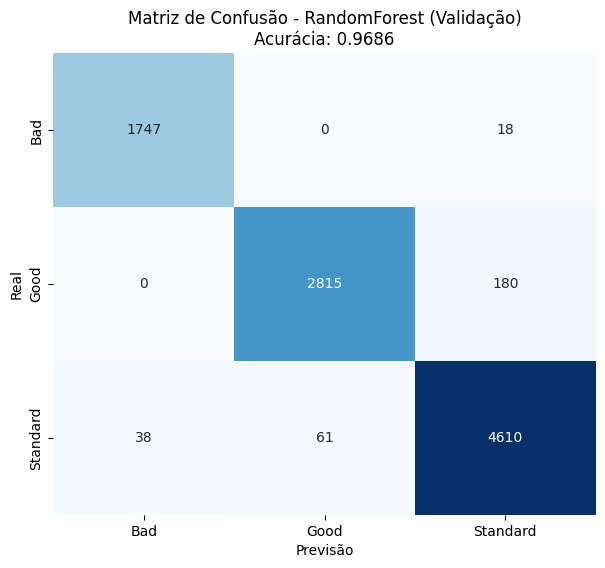

   --- Avaliação no Conjunto de Validação Concluída ---

--- Treinamento de Random Forest Concluído ---


In [ ]:
# Célula 26 (Treinamento - Random Forest)

from sklearn.ensemble import RandomForestClassifier

print("--- Iniciando Treinamento: Random Forest ---")

# Inicializar o estimador
# n_jobs=-1 para usar todos os cores disponíveis.
rf_estimator = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grade de hiperparâmetros para Random Forest
# n_estimators: número de árvores na floresta.
# max_depth: profundidade máxima de cada árvore.
# min_samples_leaf: número mínimo de amostras necessárias em um nó folha.
rf_param_grid = {
    'n_estimators': [50, 100, 200], # Comece com valores menores para teste rápido
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

# Chamar a função para treinar, otimizar e avaliar
best_rf_model = train_optimize_evaluate_model(
    model_name='RandomForest',
    estimator=rf_estimator,
    param_grid=rf_param_grid,
    X_train_data=X_train_internal,
    y_train_data=y_train_internal,
    X_val_data=X_val,
    y_val_data=y_val,
    class_names=CLASS_NAMES
)

print("\n--- Treinamento de Random Forest Concluído ---")

In [ ]:
# Célula 30 - Resumo de Desempenho dos Modelos

import pandas as pd
import os

print("--- Resumo de Desempenho dos Modelos no Conjunto de Validação ---")

# --- Definir o diretório base no Google Drive ---
# Certifique-se de que seu Google Drive já foi montado: drive.mount('/content/drive')
base_output_dir = '/content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial2'
output_performance_dir = os.path.join(base_output_dir, 'model_performance') # Nova pasta

# Crie o diretório se ele não existir
if not os.path.exists(output_performance_dir):
    os.makedirs(output_performance_dir)
    print(f"Diretório '{output_performance_dir}' criado no Google Drive.")

# Verifica se o dicionário model_performance_summary está preenchido
if model_performance_summary:
    # Converte o dicionário em um DataFrame para uma visualização mais organizada
    performance_df = pd.DataFrame.from_dict(model_performance_summary, orient='index')

    # Ordena o DataFrame pela métrica de interesse (ex: 'val_f1_weighted')
    performance_df = performance_df.sort_values(by='val_f1_weighted', ascending=False)

    print("\nResumo de Desempenho (Validação):")
    display(performance_df.round(4)) # Exibe com 4 casas decimais para clareza

    # --- Salvar o DataFrame em um arquivo CSV ---
    performance_csv_path = os.path.join(output_performance_dir, 'model_performance_summary.csv')
    performance_df.to_csv(performance_csv_path, index=True) # index=True para salvar os nomes dos modelos como índice
    print(f"\n✅ Resumo de desempenho dos modelos salvo em: {performance_csv_path}")

else:
    print("⚠️ O dicionário 'model_performance_summary' está vazio. Certifique-se de que a função 'train_optimize_evaluate_model' foi executada para todos os modelos.")

print("\n--- Visão Geral dos Modelos Otimizados ---")
if models: # 'models' armazena os melhores estimadores treinados
    print(f"Modelos otimizados disponíveis: {', '.join(models.keys())}")
else:
    print("Nenhum modelo otimizado encontrado no dicionário 'models'.")

print("\n--- Processo de Resumo Concluído ---")

--- Resumo de Desempenho dos Modelos no Conjunto de Validação ---

Resumo de Desempenho (Validação):


val_accuracy  val_f1_weighted  \
RandomForest                        0.9686           0.9686   
K-Nearest Neighbors                 0.9613           0.9613   
DecisionTree                        0.9561           0.9561   
SVM                                 0.8656           0.8647   
Linear Discriminant Analysis        0.8007           0.8000   
LogisticRegression                  0.7914           0.7911   
Gaussian Naive Bayes                0.7878           0.7864   

                              val_precision_weighted  val_recall_weighted  \
RandomForest                                  0.9688               0.9686   
K-Nearest Neighbors                           0.9613               0.9613   
DecisionTree                                  0.9561               0.9561   
SVM                                           0.8668               0.8656   
Linear Discriminant Analysis                  0.8002               0.8007   
LogisticRegression                            0.7917               0.7914   
Gaussian Naive Bayes                          0.7934               0.7878   

                                                                    best_params  
RandomForest                  {'max_depth': None, 'min_samples_leaf': 1, 'n_...  
K-Nearest Neighbors           {'metric': 'manhattan', 'n_neighbors': 3, 'wei...  
DecisionTree                  {'criterion': 'entropy', 'max_depth': None, 'm...  
SVM                                 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}  
Linear Discriminant Analysis                             {'n_components': None}  
LogisticRegression                                 {'C': 10.0, 'penalty': 'l2'}  
Gaussian Naive Bayes                                   {'var_smoothing': 1e-09}


✅ Resumo de desempenho dos modelos salvo em: /content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial2/model_performance/model_performance_summary.csv

--- Visão Geral dos Modelos Otimizados ---
Modelos otimizados disponíveis: LogisticRegression, K-Nearest Neighbors, DecisionTree, RandomForest, SVM, Gaussian Naive Bayes, Linear Discriminant Analysis

--- Processo de Resumo Concluído ---


In [ ]:
# Célula 31: Salvamento dos Modelos Treinados em .pkl

import joblib
import os

print("--- Iniciando Salvamento dos Modelos Treinados ---")

# Defina o diretório base no Google Drive para salvar os modelos
# Certifique-se de que seu Google Drive já foi montado: drive.mount('/content/drive')
base_output_dir = '/content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial2'
models_save_dir = os.path.join(base_output_dir, 'trained_models')

# Crie o diretório se ele não existir
if not os.path.exists(models_save_dir):
    os.makedirs(models_save_dir)
    print(f"Diretório '{models_save_dir}' criado no Google Drive.")

# Verifica se o dicionário 'models' foi preenchido
if models:
    for model_name, best_model in models.items():
        # Cria um nome de arquivo seguro e consistente
        # Substitui espaços por underscores e converte para minúsculas
        safe_model_name = model_name.replace(" ", "_").lower()
        model_filename = os.path.join(models_save_dir, f'{safe_model_name}_best_model.pkl')

        try:
            joblib.dump(best_model, model_filename)
            print(f"✅ Melhor modelo '{model_name}' salvo em: {model_filename}")
        except Exception as e:
            print(f"❌ Erro ao salvar o modelo '{model_name}': {e}")
else:
    print("⚠️ O dicionário 'models' está vazio. Nenhum modelo foi treinado ou armazenado.")
    print("   Certifique-se de que as células de treinamento dos modelos (Células 23-29) foram executadas.")

print("\n--- Salvamento de Modelos Concluído ---")

# Opcional: Lista os arquivos salvos para confirmação
print(f"\nArquivos .pkl encontrados em '{models_save_dir}':")
if os.path.exists(models_save_dir):
    saved_files = [f for f in os.listdir(models_save_dir) if f.endswith('.pkl')]
    if saved_files:
        for f in saved_files:
            print(f"- {f}")
    else:
        print("- Nenhum arquivo .pkl encontrado ainda.")

--- Iniciando Salvamento dos Modelos Treinados ---
✅ Melhor modelo 'LogisticRegression' salvo em: /content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial2/trained_models/logisticregression_best_model.pkl
✅ Melhor modelo 'K-Nearest Neighbors' salvo em: /content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial2/trained_models/k-nearest_neighbors_best_model.pkl
✅ Melhor modelo 'DecisionTree' salvo em: /content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial2/trained_models/decisiontree_best_model.pkl
✅ Melhor modelo 'RandomForest' salvo em: /content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial2/trained_models/randomforest_best_model.pkl
✅ Melhor modelo 'SVM' salvo em: /content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial2/trained_models/svm_best_model.pkl
✅ Melhor modelo 'Gaussian Naive Bayes' salvo em: /content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial2/trai

--- Analisando a Importância das Features do Modelo Random Forest ---
✅ Melhor modelo Random Forest carregado do arquivo: /content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix/TreinoInicial2/trained_models/randomforest_best_model.pkl
✅ Nomes das features obtidos de X_train_scaled.
Shape of feature_importances: (10,)
Length of feature_names: 10

Importância das Features (Ordenado):
                   Feature  Importance
6   Num_of_Delayed_Payment    0.233842
2        Num_Bank_Accounts    0.195007
7         Outstanding_Debt    0.144160
5      Delay_from_due_date    0.136193
1    Monthly_Inhand_Salary    0.075350
4              Num_of_Loan    0.063827
3          Num_Credit_Card    0.057178
8      Total_EMI_per_month    0.034815
9  Amount_invested_monthly    0.030278
0                      Age    0.029350


<ipython-input-33-2931259997>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


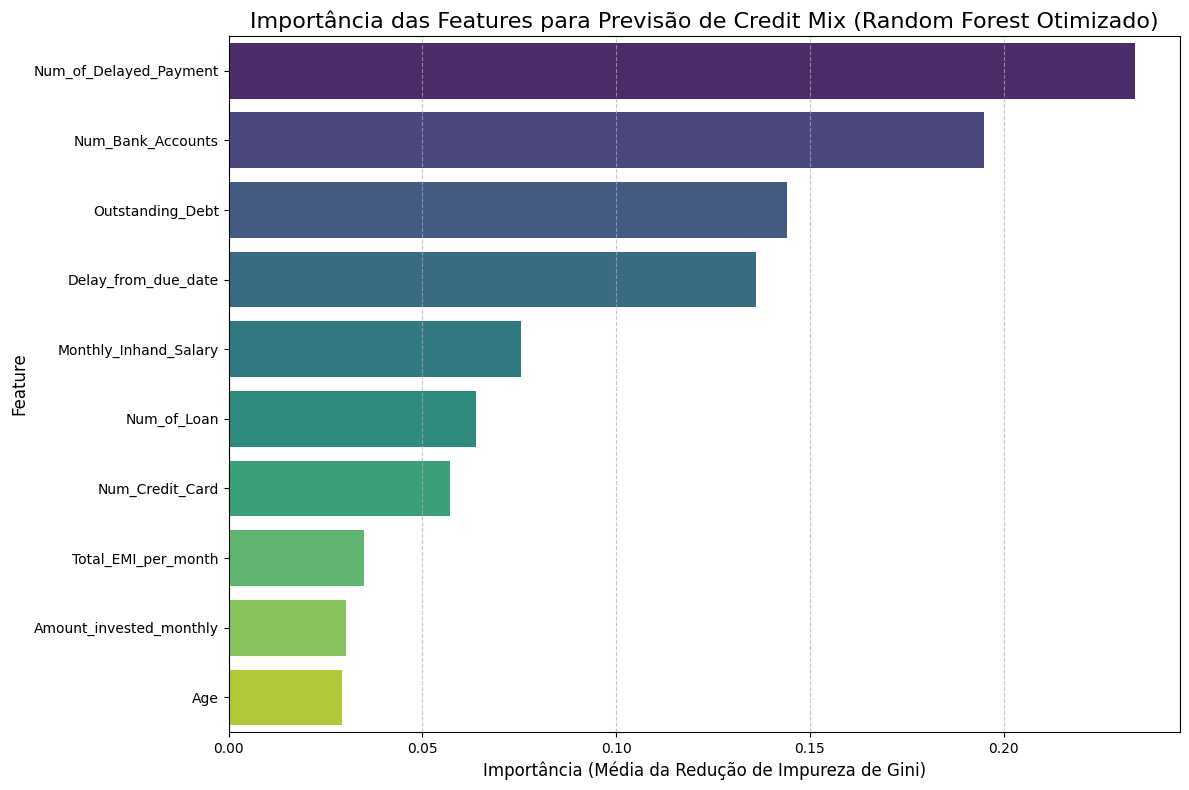


✅ Análise de importância de features concluída.


In [ ]:
# Célula 32: Análise de Importância de Features do Modelo Random Forest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # Para carregar o modelo como fallback, se necessário

print("--- Analisando a Importância das Features do Modelo Random Forest ---")

# --- Definir o diretório base no Google Drive (AJUSTADO) ---
# O caminho agora reflete onde você realmente salvou os modelos.
# Certifique-se de que seu Google Drive já foi montado: drive.mount('/content/drive')
base_output_dir = '/content/drive/MyDrive/PI5_CreditScoreClassification_CreditMix'
# O diretório onde os modelos estão salvos AGORA é TreinoInicial2/trained_models
trained_models_dir = os.path.join(base_output_dir, 'TreinoInicial2', 'trained_models')

# 1. Obter o melhor modelo Random Forest
best_random_forest_model = None

# PRIORIDADE 1: Tentar obter o modelo do dicionário 'best_models'
# (Se você tiver um dicionário 'best_models' na memória com a chave 'RandomForest')
if 'best_models' in globals() and 'RandomForest' in best_models:
    best_random_forest_model = best_models['RandomForest']
    print("✅ Melhor modelo Random Forest recuperado do dicionário 'best_models'.")
# PRIORIDADE 2: Fallback - Tentar carregar o modelo salvo no Google Drive (AJUSTADO)
# O nome do arquivo .pkl foi ajustado para 'randomforest_best_model.pkl'
elif os.path.exists(os.path.join(trained_models_dir, 'randomforest_best_model.pkl')):
    try:
        model_path = os.path.join(trained_models_dir, 'randomforest_best_model.pkl')
        best_random_forest_model = joblib.load(model_path)
        print(f"✅ Melhor modelo Random Forest carregado do arquivo: {model_path}")
    except Exception as e:
        print(f"❌ Erro ao carregar o modelo Random Forest do arquivo: {e}")
else:
    print("❌ Aviso: O modelo 'RandomForest' não foi encontrado no dicionário 'best_models' nem no disco.")
    print("Por favor, certifique-se de que o Random Forest foi treinado e salvo corretamente.")
    raise RuntimeError("Random Forest Model não encontrado. Não é possível analisar a importância das features.")

# Agora que temos best_random_forest_model, extraímos as importâncias
if best_random_forest_model and hasattr(best_random_forest_model, 'feature_importances_'):
    feature_importances = best_random_forest_model.feature_importances_
else:
    raise RuntimeError("Random Forest Model não está disponível ou não tem 'feature_importances_'. Não é possível analisar a importância das features.")


# 2. Obter os nomes das features diretamente de X_train_scaled
# Assumimos que X_train_scaled está disponível na memória da célula 21.
if 'X_train_scaled' in globals() and not X_train_scaled.empty:
    feature_names = X_train_scaled.columns.tolist()
    print("✅ Nomes das features obtidos de X_train_scaled.")
else:
    # Se X_train_scaled não estiver na memória, um erro crítico ocorreu antes.
    print("❌ Erro: 'X_train_scaled' não encontrado ou está vazio. Não é possível obter nomes das features.")
    raise RuntimeError("X_train_scaled não disponível. Verifique as células anteriores.")

# Debugging: Print shapes (manter para sua verificação)
print(f"Shape of feature_importances: {feature_importances.shape if hasattr(feature_importances, 'shape') else 'N/A'}")
print(f"Length of feature_names: {len(feature_names) if feature_names is not None else 'N/A'}")

# 3. Criar um DataFrame para visualização
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 4. Ordenar as features por importância (do maior para o menor)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nImportância das Features (Ordenado):")
print(importance_df)

# 5. Visualizar a importância das features
plt.figure(figsize=(12, min(max(8, len(feature_names)*0.4), 20))) # Tamanho dinâmico
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importância das Features para Previsão de Credit Mix (Random Forest Otimizado)', fontsize=16)
plt.xlabel('Importância (Média da Redução de Impureza de Gini)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n✅ Análise de importância de features concluída.")